# NextHikes :- Rossmann Pharmaceutical Sales prediction across multiple stores

## Data and Features 

### Id - an Id that represents a (Store, Date) duple within the test set
### Store - a unique Id for each store
### Sales - the turnover for any given day (this is what you are predicting)
### Customers - the number of customers on a given day
### Open - an indicator for whether the store was open: 0 = closed, 1 = open
### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
### StoreType - differentiates between 4 different store models: a, b, c, d
### Assortment - describes an assortment level: a = basic, b = extra, c = extended. Read more about assortment here
### CompetitionDistance - distance in meters to the nearest competitor store
### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
### Promo - indicates whether a store is running a promo on that day
### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


------------------------

# Import Libraries  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

---------------------

# Description of Sample Submission Dataset

In [2]:
sample = pd.read_csv("sample_submission.csv")

In [3]:
sample.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [4]:
sample.shape

(41088, 2)

In [5]:
sample.columns

Index(['Id', 'Sales'], dtype='object')

In [6]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      41088 non-null  int64
 1   Sales   41088 non-null  int64
dtypes: int64(2)
memory usage: 642.1 KB


In [7]:
sample.describe()

,Id,Sales
count,41088.000000,41088.0
mean,20544.500000,0.0
std,11861.228267,0.0
min,1.000000,0.0
25%,10272.750000,0.0
50%,20544.500000,0.0
75%,30816.250000,0.0
max,41088.000000,0.0


----------------

# Description of Store Dataset

In [8]:
store = pd.read_csv("store.csv")

In [9]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
store.shape

(1115, 10)

In [11]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [12]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [13]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

#### Treating missing valuse in store dataset

In [14]:
# Making two separate lists for categorical and numerical columns
categorical_cols = []
numerical_cols = []

for i in store.columns:
    print("The datatype for {} is {}".format(i,store[i].dtypes))
    if store[i].dtypes == "object":
        mode_value = store[i].mode()[0]
        store[i].fillna(mode_value, inplace = True)
    elif store[i].dtypes != "object":
        mean_value = store[i].mean()
        store[i].fillna(mean_value, inplace = True)

The datatype for Store is int64
The datatype for StoreType is object
The datatype for Assortment is object
The datatype for CompetitionDistance is float64
The datatype for CompetitionOpenSinceMonth is float64
The datatype for CompetitionOpenSinceYear is float64
The datatype for Promo2 is int64
The datatype for Promo2SinceWeek is float64
The datatype for Promo2SinceYear is float64
The datatype for PromoInterval is object


In [15]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [16]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7652.849306,2.653302,5.117695,0.500078,10.115915,1.198099
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,720.000000,6.000000,2008.000000,0.000000,22.000000,2011.763573
50%,558.00000,2330.000000,7.224704,2008.668857,1.000000,23.595447,2011.763573
75%,836.50000,6875.000000,9.000000,2011.000000,1.000000,23.595447,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


------------------

# Description of Train Dataset

In [17]:
train_data = pd.read_csv("train.csv")

In [18]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [19]:
train_data.shape

(1017209, 9)

In [20]:
train_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [22]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


 -------------

# Description of Test Dataset

In [23]:
test_data = pd.read_csv("test.csv")

In [24]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [25]:
test_data.shape

(41088, 8)

In [26]:
test_data.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [27]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [28]:
mean_value = test_data['Open'].mean()
test_data['Open'].fillna(mean_value, inplace=True)

In [29]:
test_data.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352740,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


-----------

# Task 1 - Exploration of customer purchasing behaviour

In [30]:
# Converting the date column to datetime format
train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

# Determining the minimum and maximum dates in the dataset to find the range of years
min_date = train_data['Date'].min()
max_date = train_data['Date'].max()
years_span = max_date.year - min_date.year
print('train_min_date :',min_date)
print('train_max_date :',max_date)

train_min_date : 2013-01-01 00:00:00
train_max_date : 2015-07-31 00:00:00


### Sorting the both train and test DataFrame in descending order by the date column

In [31]:
train_data_sorted = train_data.sort_values(by='Date', ascending=False)

# Displaying the sorted DataFrame
print(train_data_sorted)

# Displaying the number of years the data spans
print(f"The data spans {years_span} years.")

         Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
742        743          5 2015-07-31   5085        501     1      1   
748        749          5 2015-07-31   6612        716     1      1   
747        748          5 2015-07-31   7481        578     1      1   
746        747          5 2015-07-31  10708        826     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1016471    377          2 2013-01-01      0          0     0      0   
1016472    378          2 2013-01-01      0          0     0      0   
1016473    379          2 2013-01-01      0          0     0      0   
1016474    380          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
0                  0              1  
742                0              1  
748                0             

In [32]:
test_data_sorted = test_data.sort_values(by='Date', ascending=False)

# Display the sorted DataFrame
print(test_data_sorted)

# Display the number of years the data spans
print(f"The data spans {years_span} years.")

          Id  Store  DayOfWeek       Date  Open  Promo StateHoliday  \
0          1      1          4 2015-09-17   1.0      1            0   
563      564    728          4 2015-09-17   1.0      1            0   
565      566    731          4 2015-09-17   1.0      1            0   
566      567    732          4 2015-09-17   1.0      1            0   
567      568    733          4 2015-09-17   1.0      1            0   
...      ...    ...        ...        ...   ...    ...          ...   
40520  40521    373          6 2015-08-01   1.0      0            0   
40521  40522    377          6 2015-08-01   1.0      0            0   
40522  40523    378          6 2015-08-01   1.0      0            0   
40523  40524    379          6 2015-08-01   1.0      0            0   
41087  41088   1115          6 2015-08-01   1.0      0            0   

       SchoolHoliday  
0                  0  
563                0  
565                0  
566                0  
567                0  
...      

### Observation report of above columns 

The dataset contains two parts: "train_data" and "test_data." Both datasets have a 'Date' column, which has been converted to the datetime format.

For "train_data":

The data spans from January 1, 2013, to July 31, 2015, covering a period of 2 years. The dataset has 1,017,209 rows and 9 columns, including 'Store,' 'DayOfWeek,' 'Sales,' 'Customers,' 'Open,' 'Promo,' 'StateHoliday,' and 'SchoolHoliday.' The data is sorted in descending order based on the 'Date' column.

For "test_data":

The data spans from August 1, 2015, to September 17, 2015, covering a short period of 1 month and 17 days. The dataset has 41,088 rows and 8 columns, including 'Id,' 'Store,' 'DayOfWeek,' 'Open,' 'Promo,' 'StateHoliday,' and 'SchoolHoliday.' The data is sorted in descending order based on the 'Date' column.

It's important to note that the "test_data" only covers a small period compared to the "train_data," which spans over 2 years. Additionally, it seems that the "test_data" does not have the 'Sales' and 'Customers' columns, which are likely the target variables for prediction in a supervised machine learning scenario.

------

## Extracting columns for the graphical view point 

In [33]:
# Extract 'Date', 'Sales', and 'Customers' columns
date_sales_customers = train_data[['Date', 'Sales', 'Customers']]

# Display the extracted data
print(date_sales_customers)

              Date  Sales  Customers
0       2015-07-31   5263        555
1       2015-07-31   6064        625
2       2015-07-31   8314        821
3       2015-07-31  13995       1498
4       2015-07-31   4822        559
...            ...    ...        ...
1017204 2013-01-01      0          0
1017205 2013-01-01      0          0
1017206 2013-01-01      0          0
1017207 2013-01-01      0          0
1017208 2013-01-01      0          0

[1017209 rows x 3 columns]


#### Line plot

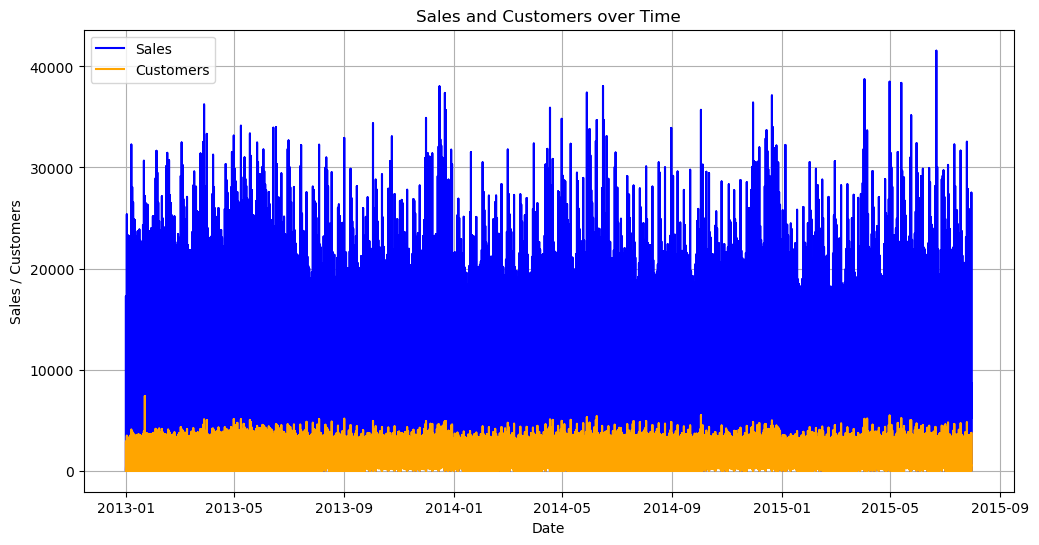

In [34]:
date_sales_customers.set_index('Date', inplace=True)

# line plot for 'Sales' and 'Customers'
plt.figure(figsize=(12, 6))
plt.plot(date_sales_customers.index, date_sales_customers['Sales'], label='Sales', color='blue')
plt.plot(date_sales_customers.index, date_sales_customers['Customers'], label='Customers', color='orange')
plt.xlabel('Date')
plt.ylabel('Sales / Customers')
plt.title('Sales and Customers over Time')
plt.legend()
plt.grid(True)
plt.show()

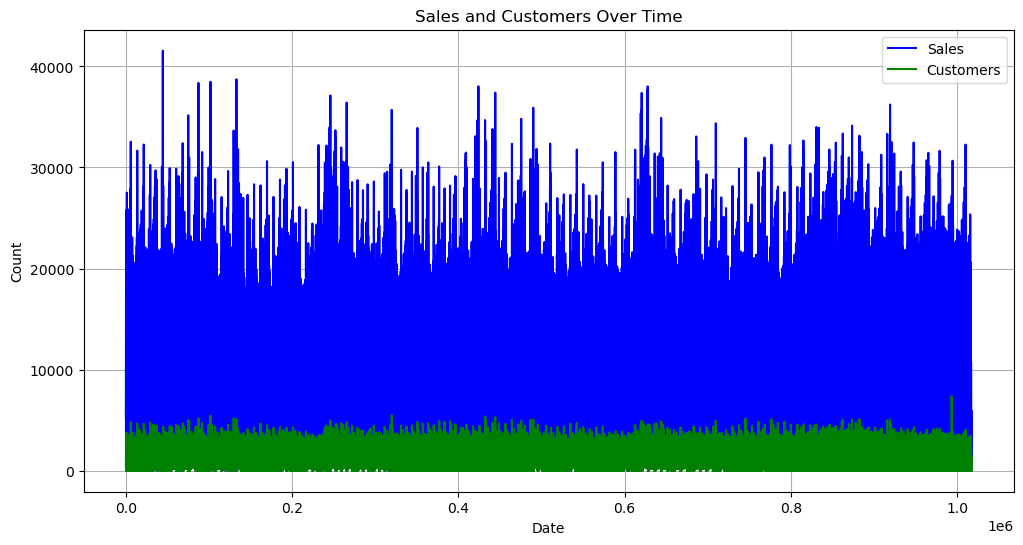

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Sales'], color='blue', label='Sales')
plt.plot(train_data.index, train_data['Customers'], color='green', label='Customers')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Sales and Customers Over Time')
plt.legend()
plt.grid()
plt.show()

### Histogram

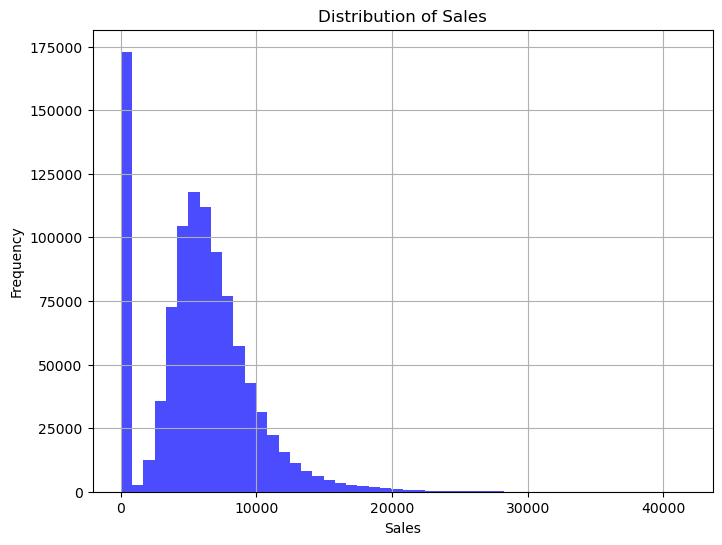

In [36]:
#  histogram for 'Sales'
plt.figure(figsize=(8, 6))
plt.hist(train_data['Sales'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.grid(True)
plt.show()

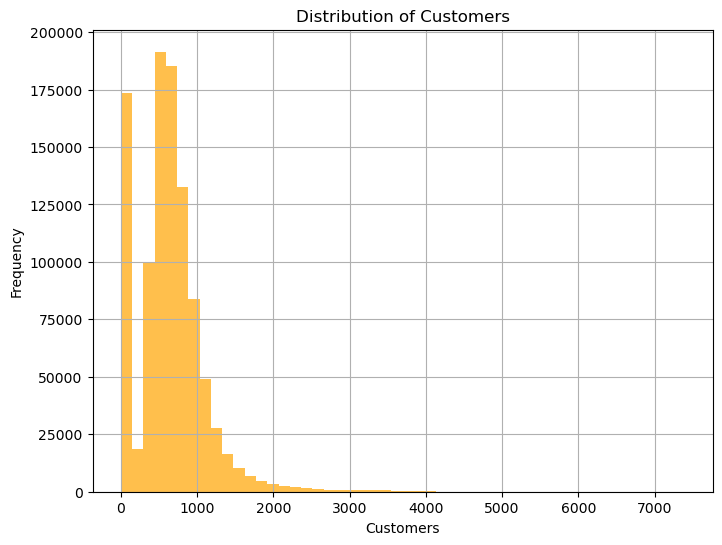

In [37]:
# Histogram for customers
plt.figure(figsize=(8, 6))
plt.hist(train_data['Customers'], bins=50, color='orange', alpha=0.7)
plt.xlabel('Customers')
plt.ylabel('Frequency')
plt.title('Distribution of Customers')
plt.grid(True)
plt.show()

### Bar plot

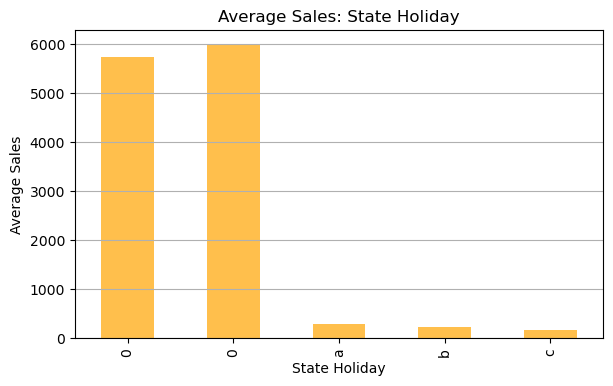

In [38]:
# the average sales for each category of 'StateHoliday' and 'SchoolHoliday'
average_sales_state_holiday = train_data.groupby('StateHoliday')['Sales'].mean()
average_sales_school_holiday = train_data.groupby('SchoolHoliday')['Sales'].mean()

# bar plots to visualize the average sales based on 'StateHoliday' and 'SchoolHoliday'
plt.figure(figsize=(15, 4))

# Plot for StateHoliday
plt.subplot(1, 2, 1)
average_sales_state_holiday.plot(kind='bar', color='orange', alpha=0.7)
plt.xlabel('State Holiday')
plt.ylabel('Average Sales')
plt.title('Average Sales: State Holiday')
plt.grid(axis='y')

a = public holiday, b = Easter holiday, c = Christmas, 0 = None

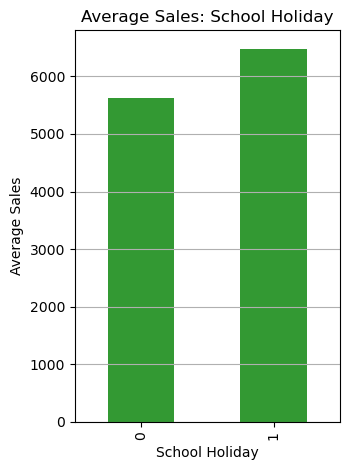

In [39]:
# Plot for SchoolHoliday
plt.subplot(1, 2, 2)
average_sales_school_holiday.plot(kind='bar', color='green', alpha=0.8)
plt.xlabel('School Holiday')
plt.ylabel('Average Sales')
plt.title('Average Sales: School Holiday')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

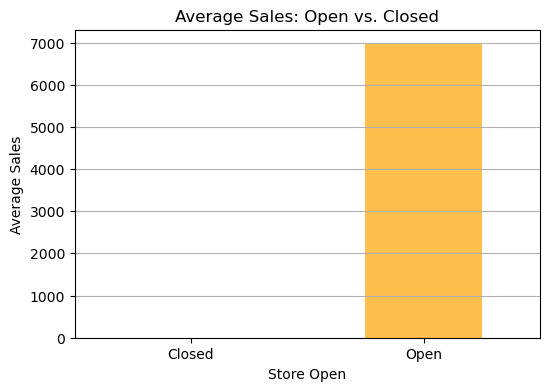

In [40]:
# the average sales for each category of 'Open' (0: Closed, 1: Open)
average_sales_open = train_data.groupby('Open')['Sales'].mean()

# Create a bar plot to visualize the average sales based on the 'Open' status
plt.figure(figsize=(6, 4))
average_sales_open.plot(kind='bar', color='orange', alpha=0.7)
plt.xlabel('Store Open')
plt.ylabel('Average Sales')
plt.title('Average Sales: Open vs. Closed')
plt.xticks([0, 1], ['Closed', 'Open'], rotation=0)
plt.grid(axis='y')
plt.show()

### Scatter plot 

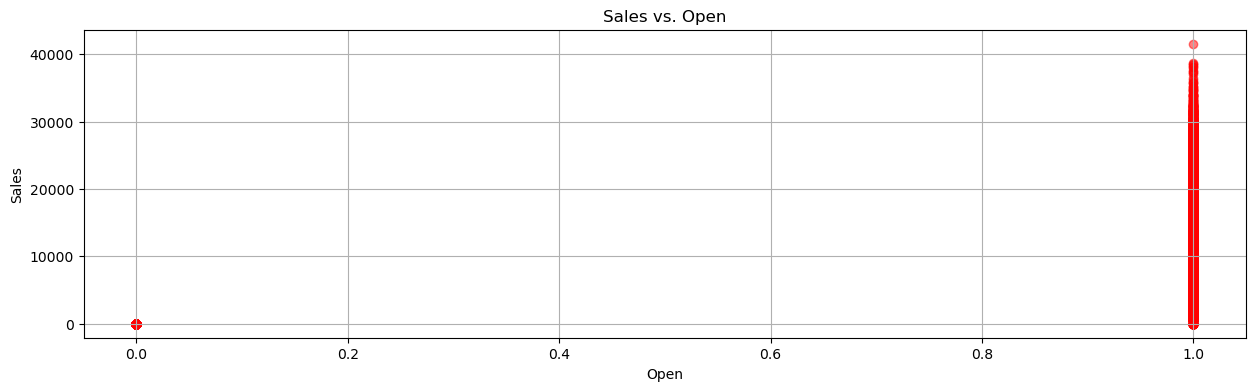

In [41]:
# a scatter plot for 'Sales' and 'Open'
plt.figure(figsize=(15, 4))
plt.scatter(train_data['Open'], train_data['Sales'], alpha=0.5, color='red')
plt.xlabel('Open')
plt.ylabel('Sales')
plt.title('Sales vs. Open')
plt.grid(True)
plt.show()

## Task - 1.1.1 Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups

In [42]:
train_promotion_stats = train_data['Promo'].describe()
test_promotion_stats = test_data['Promo'].describe()

print("Training Set Promotion Stats:")
print(train_promotion_stats)

print("\nTest Set Promotion Stats:")
print(test_promotion_stats)

Training Set Promotion Stats:
count    1.017209e+06
mean     3.815145e-01
std      4.857586e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: Promo, dtype: float64

Test Set Promotion Stats:
count    41088.000000
mean         0.395833
std          0.489035
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Promo, dtype: float64


### Visualizing the Distribution

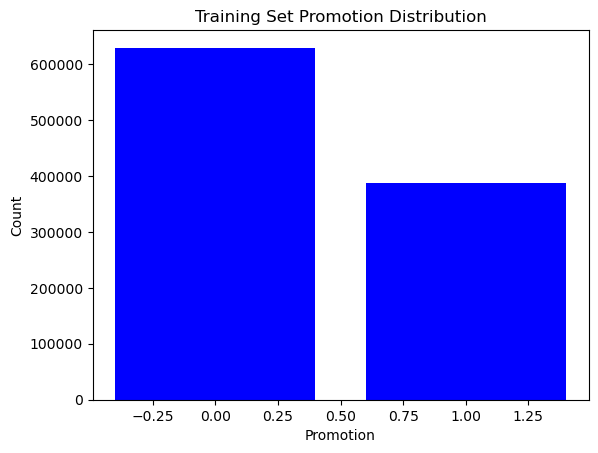

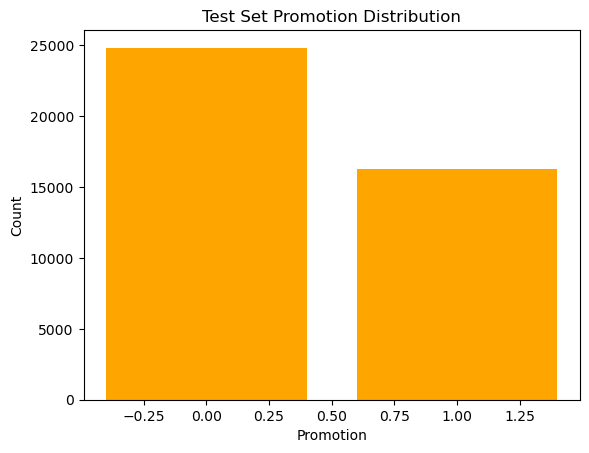

In [43]:
# Histogram for training set
plt.hist(train_data['Promo'], bins=[0, 1, 2], color='blue', align='left', rwidth=0.8)
plt.title('Training Set Promotion Distribution')
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.show()

# Histogram for test set
plt.hist(test_data['Promo'], bins=[0, 1, 2], color='orange', align='left', rwidth=0.8)
plt.title('Test Set Promotion Distribution')
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.show()

### Comparing the distribution of sales with promotion and without promotion 

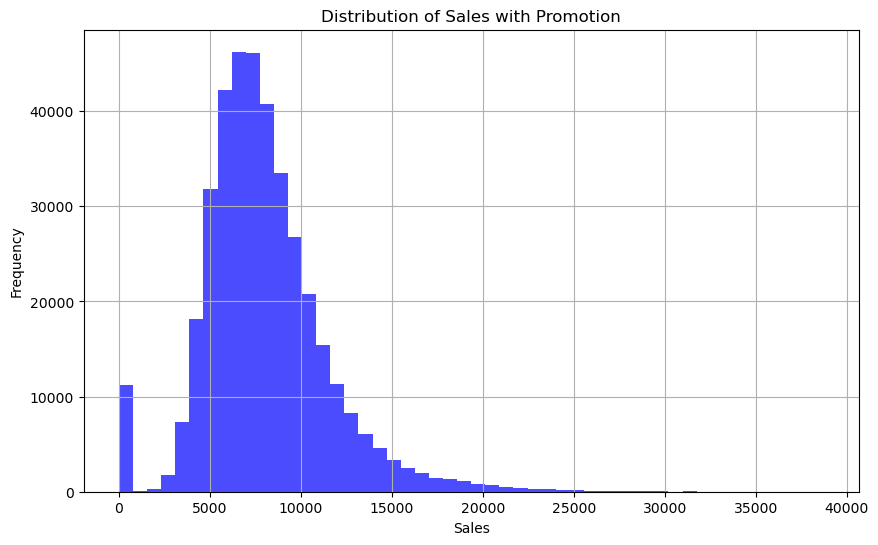

In [44]:
sales_with_promo = train_data[train_data['Promo'] == 1]['Sales']
sales_without_promo = train_data[train_data['Promo'] == 0]['Sales']

# Plot the distribution of sales with promotion
plt.figure(figsize=(10, 6))
plt.hist(sales_with_promo, bins=50, color='blue', alpha=0.7)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales with Promotion')
plt.grid()
plt.show()

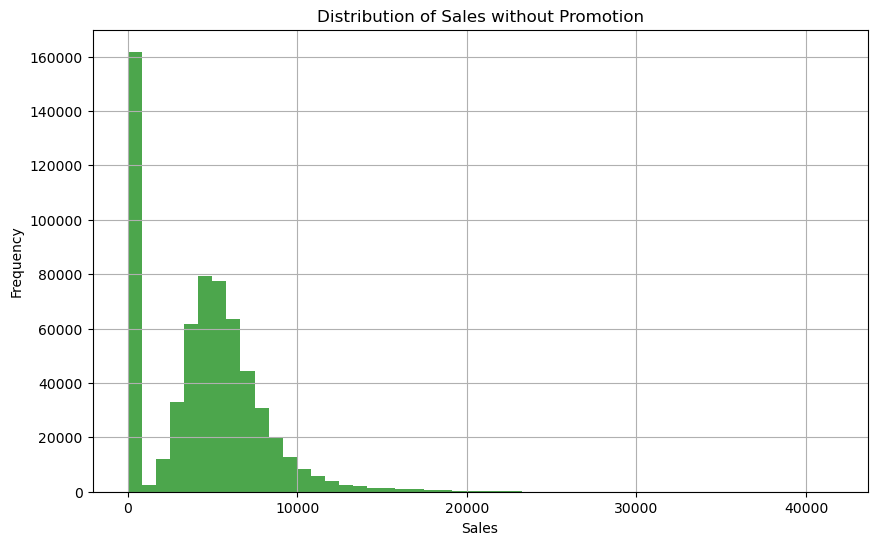

In [45]:
# Plot the distribution of sales without promotion
plt.figure(figsize=(10, 6))
plt.hist(sales_without_promo, bins=50, color='green', alpha=0.7)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales without Promotion')
plt.grid()
plt.show()

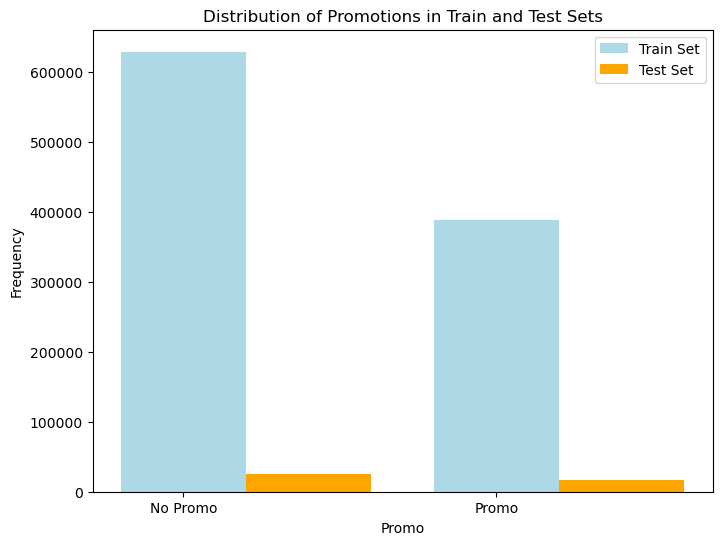

In [46]:
train_promo_counts = train_data['Promo'].value_counts()
test_promo_counts = test_data['Promo'].value_counts()

# Plot the distribution of promotions in the train set
plt.figure(figsize=(8, 6))
plt.bar(train_promo_counts.index, train_promo_counts.values, color='lightblue', width=0.4, label='Train Set')
plt.bar(test_promo_counts.index + 0.4, test_promo_counts.values, color='orange', width=0.4, label='Test Set')
plt.xlabel('Promo')
plt.ylabel('Frequency')
plt.title('Distribution of Promotions in Train and Test Sets')
plt.xticks([0, 1], ['No Promo', 'Promo'])
plt.legend()
plt.show()

### Observation report of above columns

For "train_data":

The distribution of sales with promotion the frequency has reached almost 400000 but the distribution of sales without promotion the frequency has reached more that 600000 

For "test_data":

The distribution of sales with promotion and whithout promotion has only slite diffrence between them  

It's important to note that the "test_data" only covers a small period compared to the "train_data," But still the diffrence of sales with promotion and without promotion is huge there might be the other factors behind that

------

## Detecting outliers in the numerical columns 

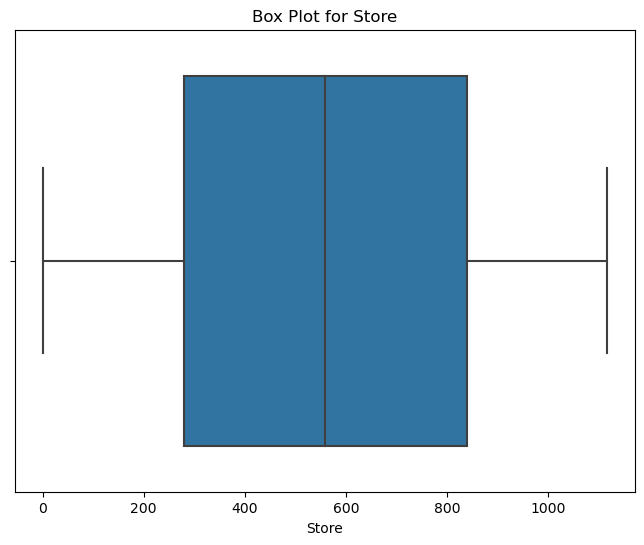

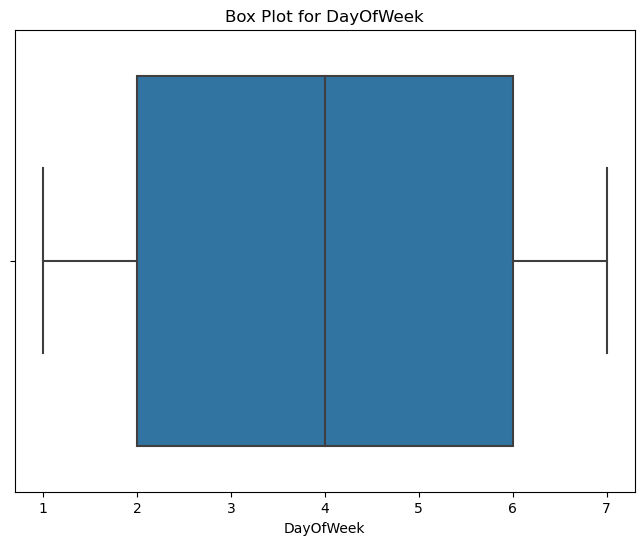

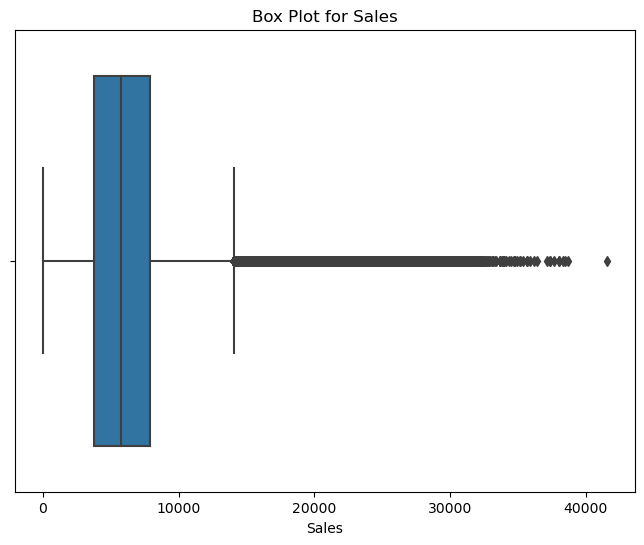

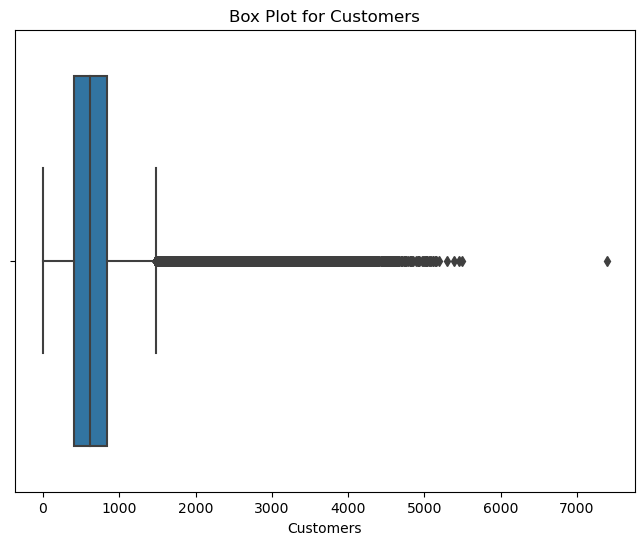

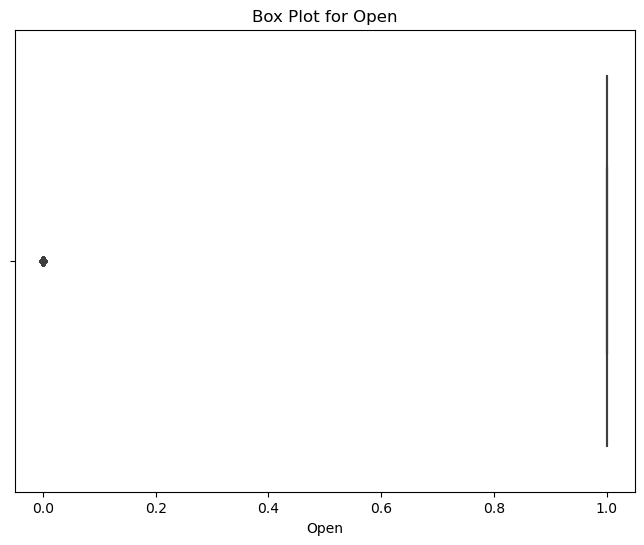

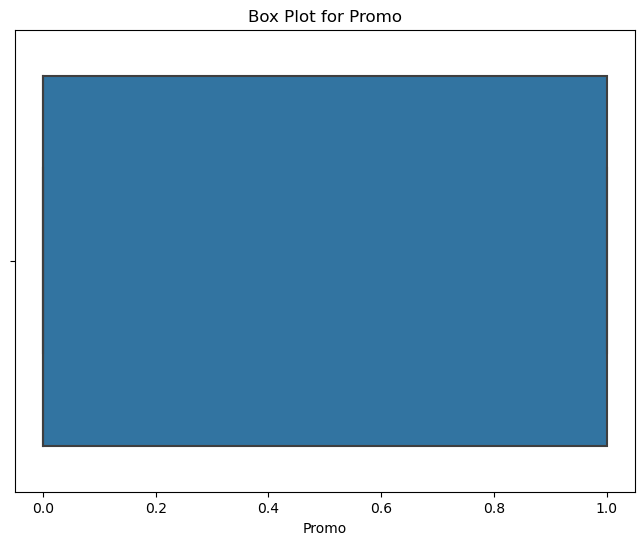

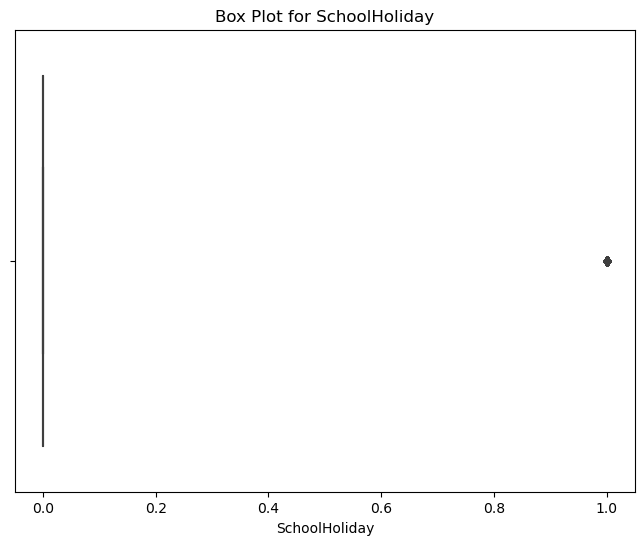

In [47]:
# List of numerical columns in the "train_data" DataFrame
train_data_numerical_columns = ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday']

# box plots for each numerical column
for col in train_data_numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=train_data, x=col)
    plt.title(f'Box Plot for {col}')
    plt.show()

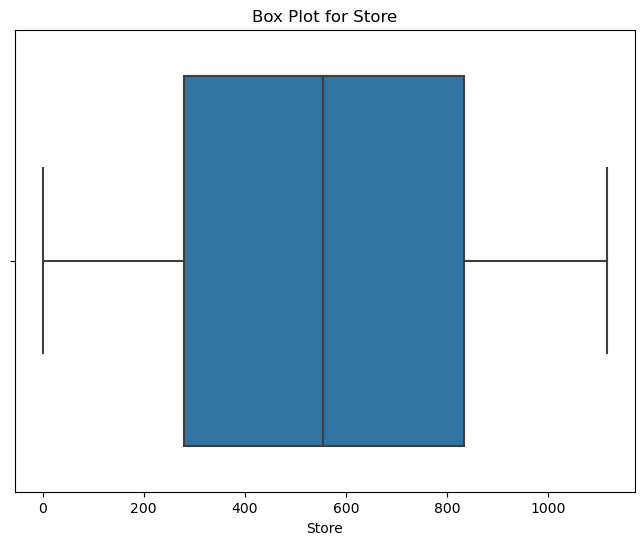

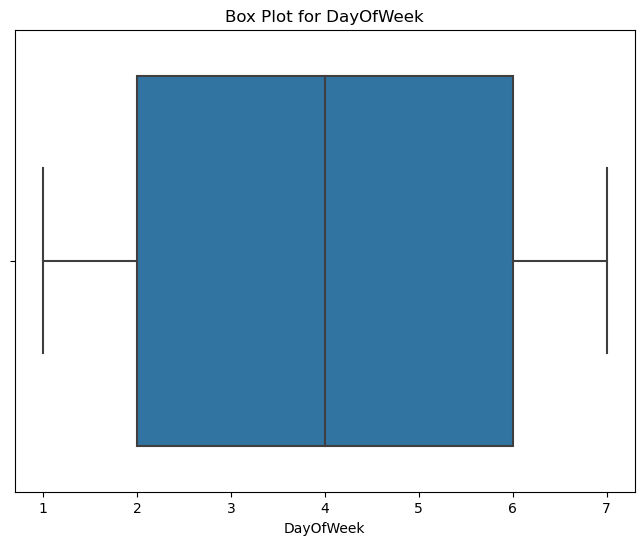

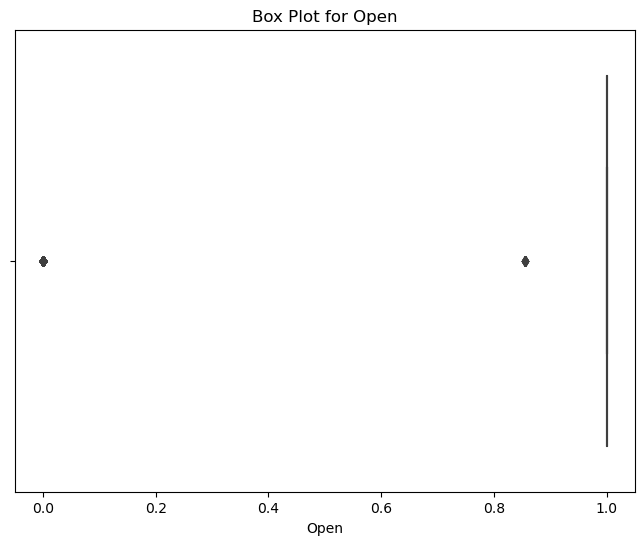

In [48]:
# List of numerical columns in the "test_data" DataFrame
test_data_numerical_columns = ['Store', 'DayOfWeek', 'Open']

# Create box plots for each numerical column
for col in test_data_numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=test_data, x=col)
    plt.title(f'Box Plot for {col}')
    plt.show()

#### Outliners present in sales and customers boxplot

--------------

## Treating outliers 

In [49]:
# for Sales columns 

q1 = np.percentile(train_data["Sales"], 25)
q2 = np.percentile(train_data["Sales"], 50)
q3 = np.percentile(train_data["Sales"], 75)

iqr=q3-q1
iqr
lower_range=q1-iqr*1.5
upper_range=q3+iqr*1.5

#  first quartile (q1) and third quartile (q3) for the "Sales" column
q1_sales = train_data['Sales'].quantile(0.25)
q3_sales = train_data['Sales'].quantile(0.75)

# interquartile range (iqr) for "Sales"
iqr_sales = q3_sales - q1_sales

# lower and upper bounds for outlier detection for "Sales"
lower_range_sales = q1_sales - 1.5 * iqr_sales
upper_range_sales = q3_sales + 1.5 * iqr_sales

# Identifying outliers in the "Sales" column
outliers_lower_sales = train_data[train_data['Sales'] < lower_range_sales]
outliers_upper_sales = train_data[train_data['Sales'] > upper_range_sales]

print(f"Outliers (lower bound): {outliers_lower_sales['Sales'].values}")
print(f"Outliers (upper bound): {outliers_upper_sales['Sales'].values}")

Outliers (lower bound): []
Outliers (upper bound): [15344 14190 14180 ... 20355 20642 17267]


In [50]:
train_data['Sales'] = train_data['Sales'].clip(lower_range_sales, upper_range_sales)

In [51]:
# for Customer columns

Q1 = train_data['Customers'].quantile(0.25)
Q3 = train_data['Customers'].quantile(0.75)

#interquartile range (IQR)
IQR = Q3 - Q1

# lower and upper bounds for outlier detection
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR

# Identifying outliers in the "Customers" column
outliers_lower = train_data[train_data['Customers'] < lower_range]
outliers_upper = train_data[train_data['Customers'] > upper_range]

print(f"Outliers (lower bound): {outliers_lower['Customers'].values}")
print(f"Outliers (upper bound): {outliers_upper['Customers'].values}")

Outliers (lower bound): []
Outliers (upper bound): [1498 1586 2041 ... 1751 1675 2377]


In [52]:
train_data['Customers'] = train_data['Customers'].clip(upper=upper_range)

### After removing outliers 

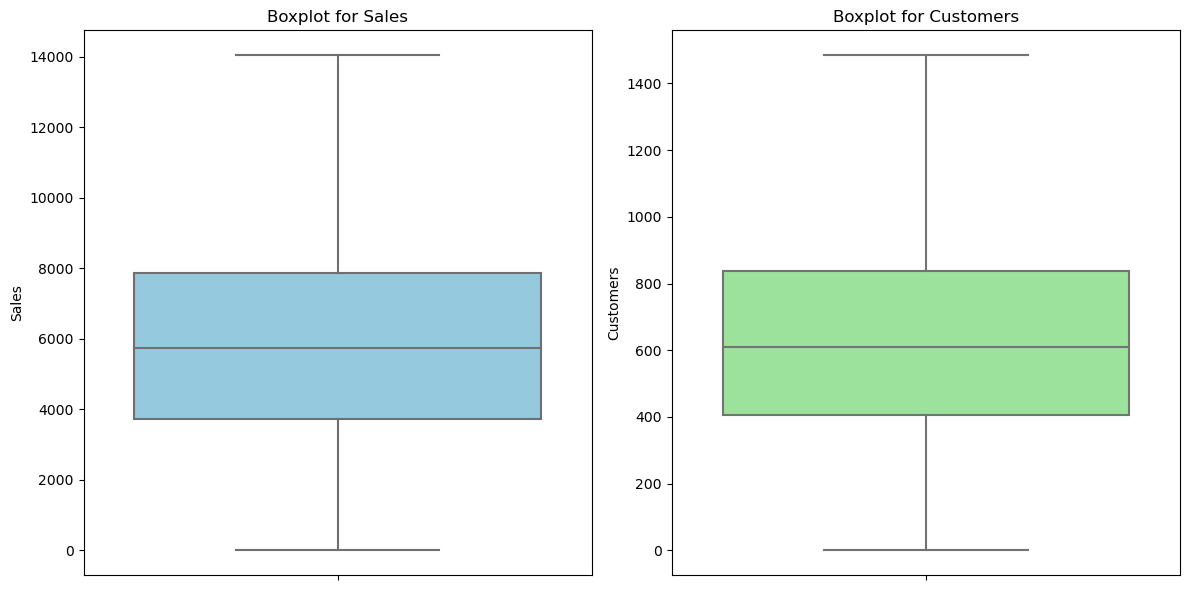

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Boxplot for Sales
sns.boxplot(data=train_data, y='Sales', ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot for Sales')

# Boxplot for Customers
sns.boxplot(data=train_data, y='Customers', ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot for Customers')

# Display the plots
plt.tight_layout()
plt.show()

----------

## Task - 1.1.2 Check & compare sales behavior before, during and after holidays 

In [54]:
train_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [55]:
# Creating a new column 
train_data['Holiday'] = train_data['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)
train_data['Holiday'] = train_data['SchoolHoliday']

In [56]:
# Split the data into three groups: before holiday, during holiday, and after holiday
before_holiday_sales = train_data[train_data['Holiday'] == 0]['Sales']
during_holiday_sales = train_data[train_data['Holiday'] == 1]['Sales']
after_holiday_sales = train_data[train_data['Holiday'].shift(-1) == 1]['Sales']  # Shift to identify after holiday

In [57]:
# Calculate the average sales for each group
average_sales_before_holiday = before_holiday_sales.mean()
average_sales_during_holiday = during_holiday_sales.mean()
average_sales_after_holiday = after_holiday_sales.mean()

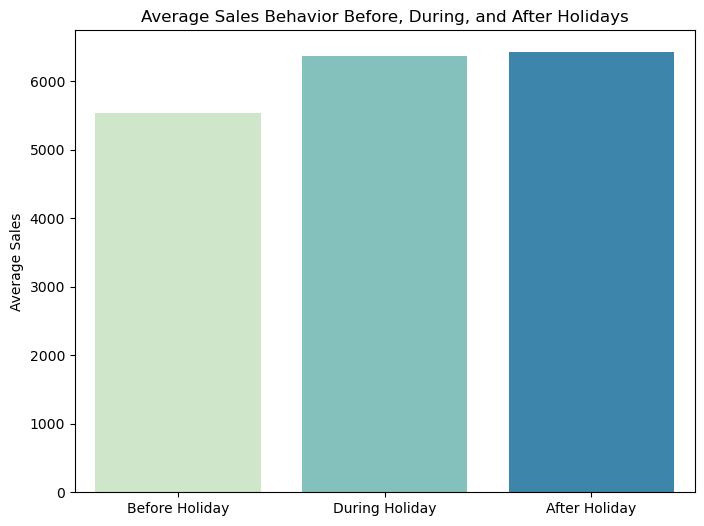

In [58]:
# Plot the average sales behavior before, during, and after holidays using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Before Holiday', 'During Holiday', 'After Holiday'],
            y=[average_sales_before_holiday, average_sales_during_holiday, average_sales_after_holiday],
            palette='GnBu')
plt.title('Average Sales Behavior Before, During, and After Holidays')
plt.ylabel('Average Sales')
plt.show()

In [59]:
# Calculate the total sales for each group
total_sales_before_holiday = before_holiday_sales.sum()
total_sales_during_holiday = during_holiday_sales.sum()
total_sales_after_holiday = after_holiday_sales.sum()

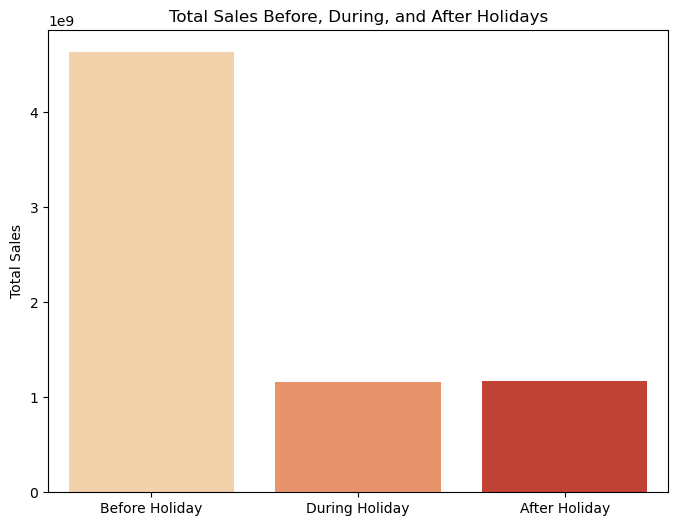

In [60]:
# Plot the total sales behavior before, during, and after holidays using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Before Holiday', 'During Holiday', 'After Holiday'],
            y=[total_sales_before_holiday, total_sales_during_holiday, total_sales_after_holiday],
            palette='OrRd')
plt.title('Total Sales Before, During, and After Holidays')
plt.ylabel('Total Sales')
plt.show()

##### Observation

Average Sales Behavior Before, During, and After Holidays:

Based on the analysis, we have collected before the holidays the average sales behavior is around the numbers of 5500. During the holidays the average sales behavior is around the numbers of 6200. After the holidays the average sales behavior is around the numbers of 6250.

The total sales behavior before, during, and after Holidays:

Based on the analysis, we have collected the highest total sales we have is before the holidays. during the holidays and after the holidays the total sales rename the same.

The conclusion is that the total sales is higher before the holidays but the average sales is higher after the holidays.

------------------

## Task - 1.1.3 Find out any seasonal (Christmas, Easter etc) purchase behaviours

In [61]:
# Creating a function for the different seasons

def get_season(date):
    month = date.month
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['Season'] = train_data['Date'].apply(get_season)


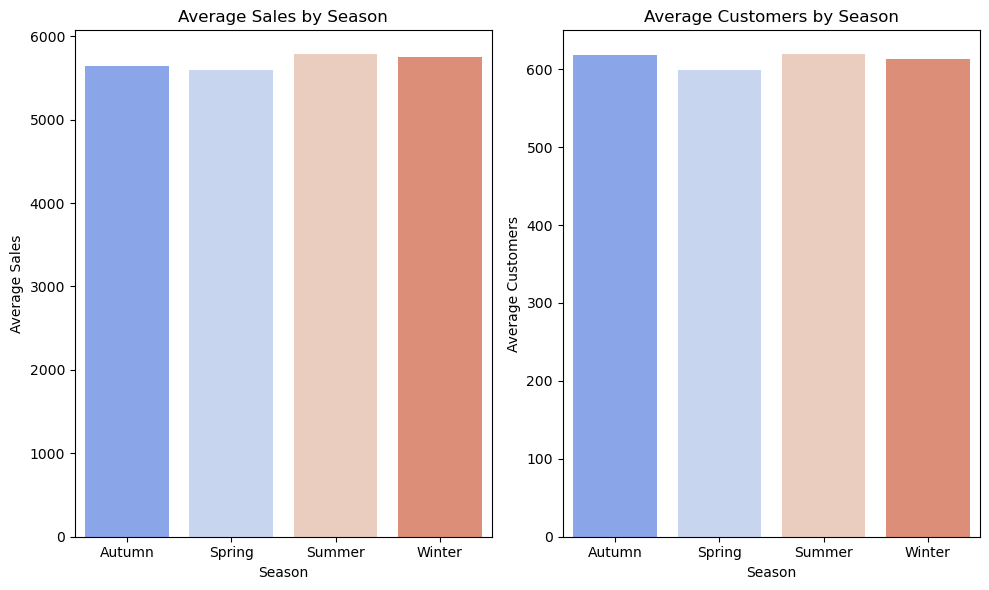

In [62]:
# Calculate average sales and customers for each season
average_sales_by_season = train_data.groupby('Season')['Sales'].mean()
average_customers_by_season = train_data.groupby('Season')['Customers'].mean()

# Create a list of seasons and their respective average sales and customers
seasons = average_sales_by_season.index
average_sales = average_sales_by_season.values
average_customers = average_customers_by_season.values

# Plot the bar plots for average sales and customers by season
plt.figure(figsize=(10, 6))

# Bar plot for average sales
plt.subplot(1, 2, 1)
sns.barplot(x=seasons, y=average_sales, palette='coolwarm')
plt.title('Average Sales by Season')
plt.xlabel('Season')
plt.ylabel('Average Sales')

# Bar plot for average customers
plt.subplot(1, 2, 2)
sns.barplot(x=seasons, y=average_customers, palette='coolwarm')
plt.title('Average Customers by Season')
plt.xlabel('Season')
plt.ylabel('Average Customers')

plt.tight_layout()
plt.show()

##### observation

For "Average Sales by Seasons":

Summer season has the most average sales in all of the four seasons and Spring season has the least average sales in all of four seasons but according to bar polt all the season's average sales are fall between 5000 to 6000  

For "Average Customers by Season":

Summer season and Autumn season has the most and same number of average customer more that 600 and Spring season has the least number of average customer in all of season little less than 600

The conclusion is that the Summer season has the higest sales in all seasons and the Spring season has the lowest sales in all seasons

In [63]:
# Creating function for seasonal special Occasions 

def the_christmas(date):
    return date.month == 12 and date.day in [24, 25, 26]

def the_easter(date):
    return date.month == 4 and date.day in [18, 19, 20, 21, 22]

def the_new_year(date):
    return date.month == 1 and date.day in [1]

def the_valentines_day(date):
    return date.month == 2 and date.day in [13, 14, 15]

def the_halloween(date):
    return date.month == 10 and date.day in [29, 30, 31]

def the_thanksgiving(date):
    return date.month == 11 and date.day in [22, 23, 24, 25, 26]



In [64]:
# Creating columns and applying functions 

train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['Christmas'] = train_data['Date'].apply(lambda x: 1 if the_christmas(x) else 0)
train_data['Easter'] = train_data['Date'].apply(lambda x: 1 if the_easter(x) else 0)
train_data["NewYear"] = train_data['Date'].apply(lambda x: 1 if the_new_year(x) else 0)
train_data["ValentinesDay"] = train_data['Date'].apply(lambda x: 1 if the_valentines_day(x) else 0)
train_data["Halloween"] = train_data['Date'].apply(lambda x: 1 if the_halloween(x) else 0)
train_data["Thanksgiving"] = train_data['Date'].apply(lambda x: 1 if the_thanksgiving(x) else 0)


In [65]:
# Finding the average customer on special occasions 

average_customers_christmas = train_data.groupby('Christmas')['Customers'].mean()
average_customers_easter = train_data.groupby('Easter')['Customers'].mean()
average_customers_new_year = train_data[train_data['NewYear'] == 1]['Customers'].mean()
average_customers_valentines_day = train_data.groupby('ValentinesDay')['Customers'].mean()
average_customers_halloween = train_data.groupby('Halloween')['Customers'].mean()
average_customers_thanksgiving = train_data.groupby('Thanksgiving')['Customers'].mean()


# The Seasonal Special Occasions and average customer 

seasonal_special_occasions = ['Christmas', 'Easter', 'New Year', "Valentine's Day", 'Halloween', 'Thanksgiving']
average_customers = [average_customers_christmas.mean(), average_customers_easter.mean(), average_customers_new_year, average_customers_valentines_day.mean(),
                     average_customers_halloween.mean(), average_customers_thanksgiving.mean()]


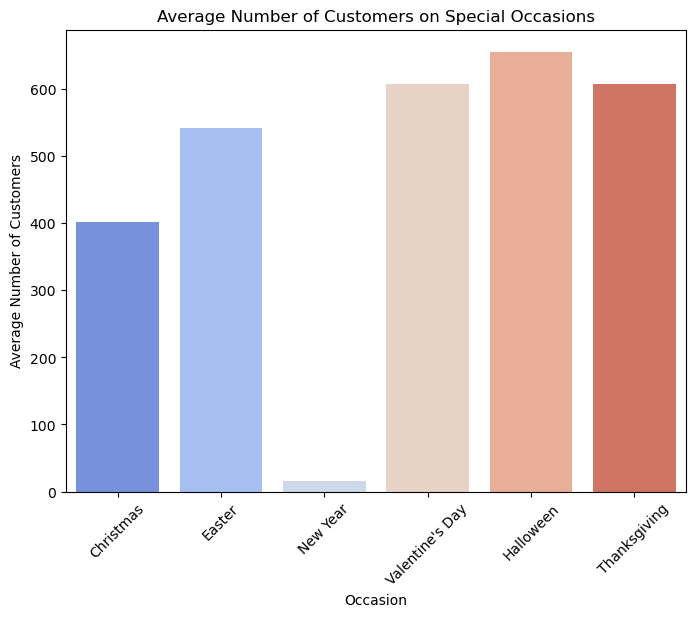

In [66]:
# Plotting Bar plot for the Average Number of Customers on Special Occasions

plt.figure(figsize=(8, 6))
sns.barplot(x=seasonal_special_occasions, y=average_customers, palette='coolwarm')
plt.title('Average Number of Customers on Special Occasions')
plt.xlabel('Occasion')
plt.ylabel('Average Number of Customers')
plt.xticks(rotation=45)
plt.show()

In [67]:
# Finding the average sales on special occasions 

average_sales_christmas = train_data.groupby('Christmas')['Sales'].mean()
average_sales_easter = train_data.groupby('Easter')['Sales'].mean()
average_sales_new_year = train_data[train_data['NewYear'] == 1]['Sales'].mean()
average_sales_valentines_day = train_data.groupby('ValentinesDay')['Sales'].mean()
average_sales_halloween = train_data.groupby('Halloween')['Sales'].mean()
average_sales_thanksgiving = train_data.groupby('Thanksgiving')['Customers'].mean()

# The Seasonal Special Occasions sales
average_sales = [average_sales_christmas.mean(), average_sales_easter.mean(),average_sales_new_year,
                 average_sales_valentines_day.mean(), average_sales_halloween.mean(),
                 average_sales_thanksgiving.mean()]

print(average_sales)

[3708.1343910253017, 4912.681271411424, 98.73459928229666, 5448.709204773698, 5877.633450599173, 606.2807027966528]


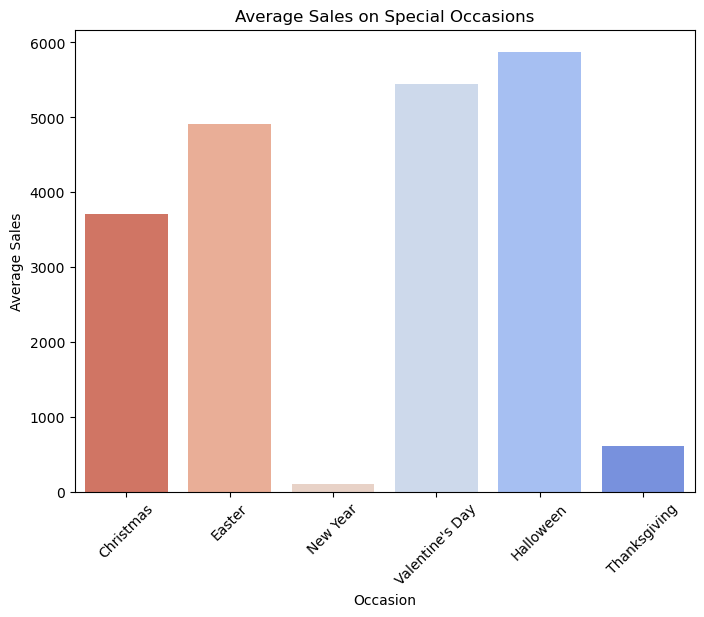

In [68]:
# Plotting Bar plot for the Average Number of Sales on Special Occasions

plt.figure(figsize=(8, 6))
sns.barplot(x=seasonal_special_occasions, y=average_sales, palette='coolwarm_r')
plt.title('Average Sales on Special Occasions')
plt.xlabel('Occasion')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

##### Observation

For the Average Number of Customers on Special Occasions:

Based on the analysis, we have collected Halloween has the most average number of customers on special occasions around 650 customer and New Year has the least average number of customers on special occasions around 25 customer or so.

For the Average Number of sales on Special Occasions:

Based on the analysis, we have collected Halloween has the most average number of sales on special occasions around 6700 sales and New Year has the least average number of sales on special occasions around 250 sales

The Conclusion is that the higest sales happens on the special occasions of Halloween and the lowest sales happens on the special occasions of New Year 

-------------------

## Task - 1.1.4 What can you say about the correlation between sales and number of customers

In [69]:
# Correlation between Sales and number of customers
train_data[['Customers','Sales']].corr()

,Customers,Sales
Customers,1.000000,0.920805
Sales,0.920805,1.000000


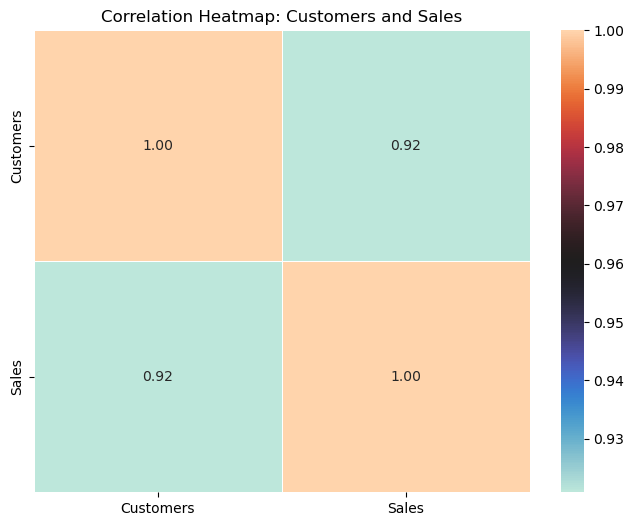

In [70]:
corr_data = train_data[['Customers', 'Sales']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_data, annot=True, cmap='icefire', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Customers and Sales')
plt.show()

In [71]:
corr_sales_customers = train_data['Sales'].corr(train_data['Customers'])
print(f"Correlation between Sales and Customers: {corr_sales_customers}")

Correlation between Sales and Customers: 0.9208048531996548


##### Observation

Based on the analysis, This value indicates a strong positive correlation between these two variables. It suggests that there is a significant relationship between the number of customers visiting the stores and the sales generated. In other words, as the number of customers increases, the sales tend to increase as well, and vice versa.

This strong positive correlation is expected since it is common for businesses to experience higher sales when there are more customers. The high correlation coefficient suggests that the number of customers is a good indicator of sales performance, and it can be a useful feature for predicting future sales in the dataset.

------------

## Task - 1.1.5 How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers

##### How does promo affect sales 

<Figure size 600x600 with 0 Axes>

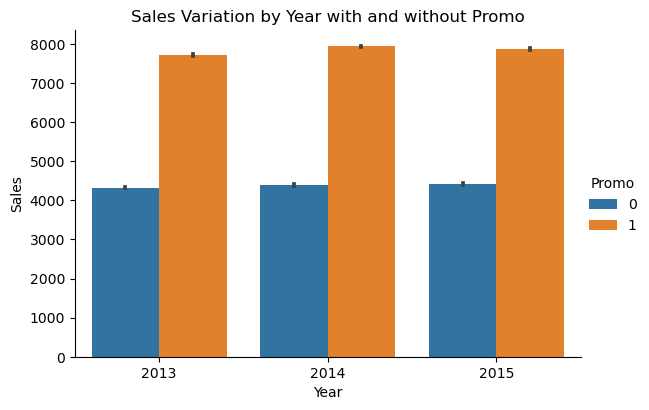

In [72]:
# Extract year, month, and day from the 'Date' column
train_data['Year'] = train_data['Date'].dt.year
train_data['Month'] = train_data['Date'].dt.month
train_data['Day'] = train_data['Date'].dt.day

plt.figure(figsize=(6, 6))
sns.catplot(data=train_data, x="Year", y="Sales", hue='Promo', kind='bar', height=4, aspect=1.5)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Variation by Year with and without Promo')
plt.show()

<Figure size 800x600 with 0 Axes>

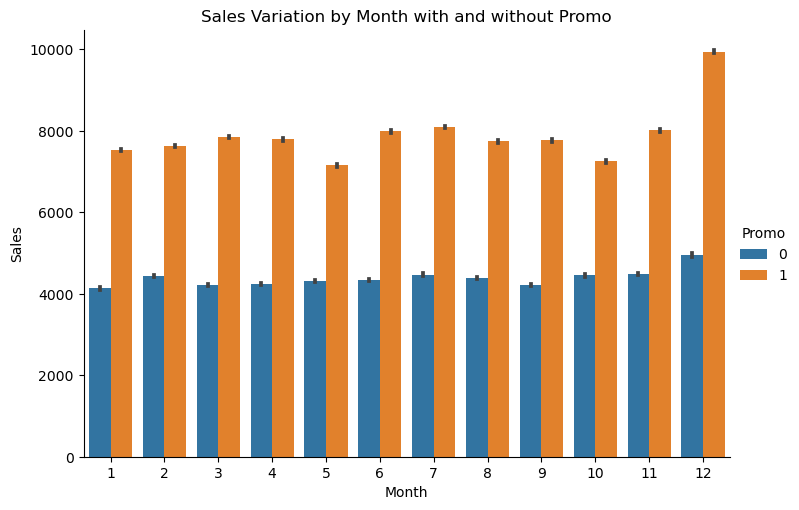

In [73]:
plt.figure(figsize=(8, 6))
sns.catplot(data=train_data, x="Month", y="Sales", hue='Promo', kind='bar', height=5, aspect=1.5)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales Variation by Month with and without Promo')
plt.show()

<Figure size 600x300 with 0 Axes>

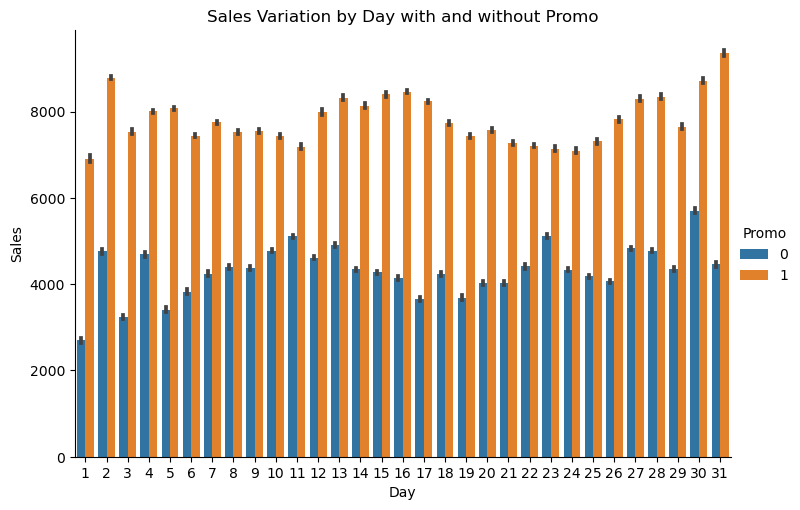

In [74]:
plt.figure(figsize=(6, 3))
sns.catplot(data=train_data, x="Day", y="Sales", hue='Promo', kind='bar', height=5, aspect=1.5)
plt.xlabel('Day')
plt.ylabel('Sales')
plt.title('Sales Variation by Day with and without Promo')
plt.show()

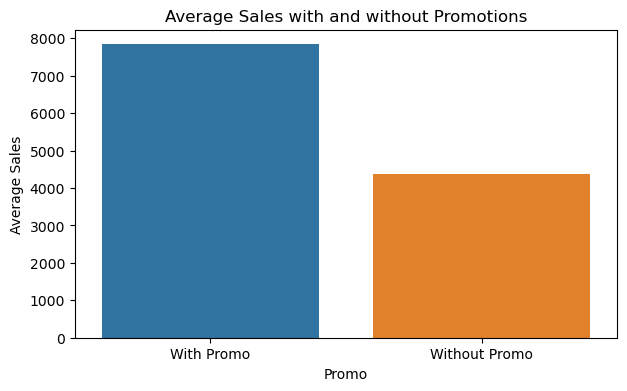

In [75]:
avg_sales_with_promo = train_data[train_data['Promo'] == 1]['Sales'].mean()
avg_sales_without_promo = train_data[train_data['Promo'] == 0]['Sales'].mean()

# Create a bar plot to compare average sales with and without promotions
plt.figure(figsize=(7, 4))
sns.barplot(x=['With Promo', 'Without Promo'], y=[avg_sales_with_promo, avg_sales_without_promo])
plt.title('Average Sales with and without Promotions')
plt.xlabel('Promo')
plt.ylabel('Average Sales')
plt.show()

##### Are the promos attracting more customers

<Figure size 600x600 with 0 Axes>

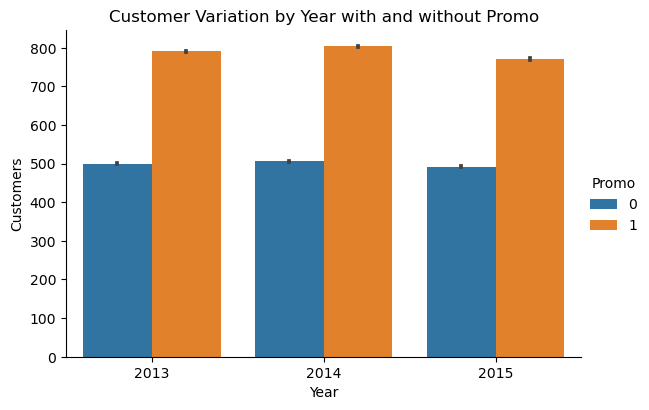

In [76]:
plt.figure(figsize=(6, 6))
sns.catplot(data=train_data, x="Year", y="Customers", hue='Promo', kind='bar', height=4, aspect=1.5)
plt.xlabel('Year')
plt.ylabel('Customers')
plt.title('Customer Variation by Year with and without Promo')
plt.show()

<Figure size 800x600 with 0 Axes>

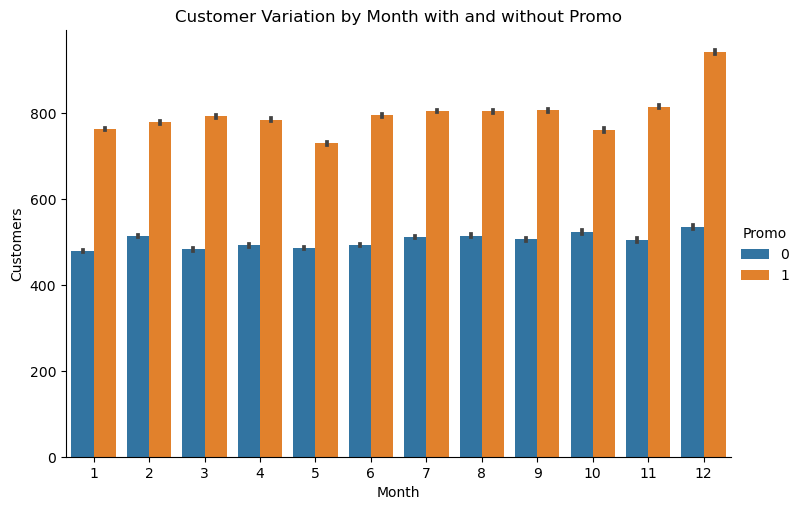

In [77]:
plt.figure(figsize=(8, 6))
sns.catplot(data=train_data, x="Month", y="Customers", hue='Promo', kind='bar', height=5, aspect=1.5)
plt.xlabel('Month')
plt.ylabel('Customers')
plt.title('Customer Variation by Month with and without Promo')
plt.show()

<Figure size 600x300 with 0 Axes>

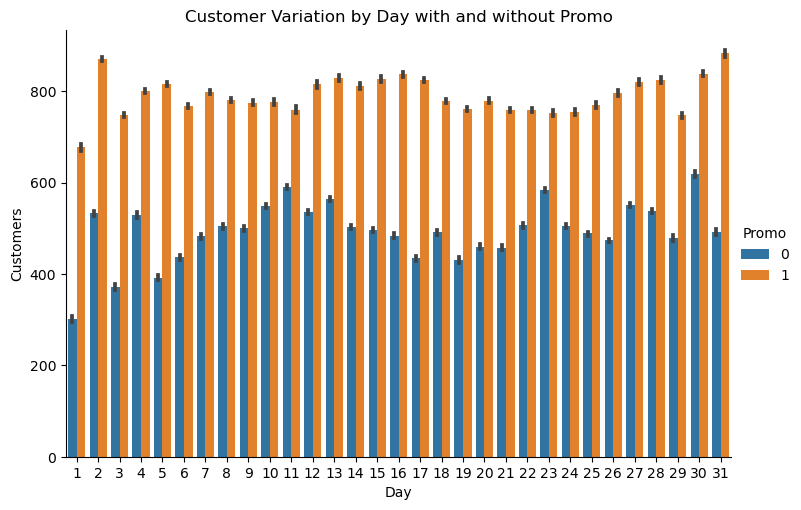

In [78]:
plt.figure(figsize=(6,3))
sns.catplot(data=train_data, x="Day", y="Customers", hue='Promo', kind='bar', height=5, aspect=1.5)
plt.xlabel('Day')
plt.ylabel('Customers')
plt.title('Customer Variation by Day with and without Promo')
plt.show()

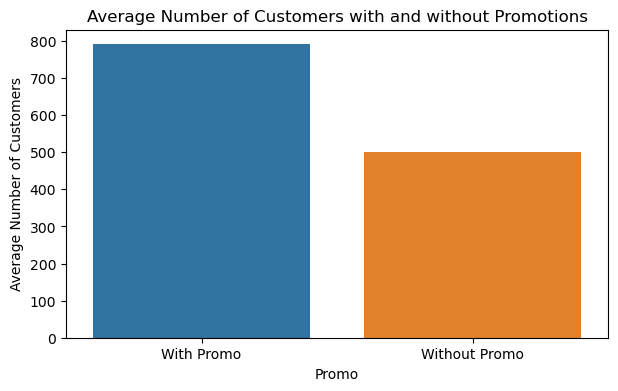

In [79]:
avg_customers_with_promo = train_data[train_data['Promo'] == 1]['Customers'].mean()
avg_customers_without_promo = train_data[train_data['Promo'] == 0]['Customers'].mean()

# Create a bar plot to compare average number of customers with and without promotions
plt.figure(figsize=(7, 4))
sns.barplot(x=['With Promo', 'Without Promo'], y=[avg_customers_with_promo, avg_customers_without_promo])
plt.title('Average Number of Customers with and without Promotions')
plt.xlabel('Promo')
plt.ylabel('Average Number of Customers')
plt.show()

##### How does it affect already existing customers

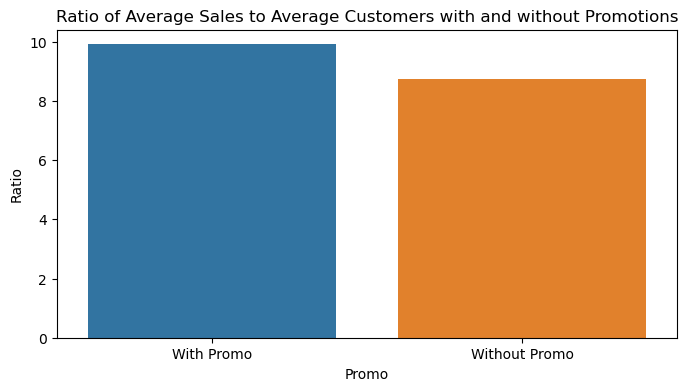

In [80]:
avg_sales_with_promo = train_data[train_data['Promo'] == 1]['Sales'].mean()
avg_customers_with_promo = train_data[train_data['Promo'] == 1]['Customers'].mean()
avg_sales_without_promo = train_data[train_data['Promo'] == 0]['Sales'].mean()
avg_customers_without_promo = train_data[train_data['Promo'] == 0]['Customers'].mean()

# Calculate the ratio of average sales to average customers for days with and without promotions
ratio_with_promo = avg_sales_with_promo / avg_customers_with_promo
ratio_without_promo = avg_sales_without_promo / avg_customers_without_promo

# Create a bar plot to compare the ratios of average sales to average customers with and without promotions
plt.figure(figsize=(8, 4))
sns.barplot(x=['With Promo', 'Without Promo'], y=[ratio_with_promo, ratio_without_promo])
plt.title('Ratio of Average Sales to Average Customers with and without Promotions')
plt.xlabel('Promo')
plt.ylabel('Ratio')
plt.show()

##### observation

Based on the analysis, we have notice that the Sales Variation by Year, by Month and by days with the Promo is more effective and more profitable then without Promo.

It appears that sales and the number of customers are higher on days with promotions compared to days without promotions. This suggests that promotions are attracting more customers and leading to increased sales. The ratio of average sales to average customers is also higher on promotional days, indicating that existing customers tend to spend more when there are promotions.

So, promo is playing vital role in getting more customer and making profitable sales.

-------------

## Task - 1.1.6 Could the promos be deployed in more effective ways? Which stores should promos be deployed in

In [81]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
1,2,a,a,570.0,11.0,2007.0,1,13.000000,2010.000000,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.000000,2011.000000,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
4,5,a,a,29910.0,4.0,2015.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"


In [82]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [83]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7652.849306,2.653302,5.117695,0.500078,10.115915,1.198099
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,720.000000,6.000000,2008.000000,0.000000,22.000000,2011.763573
50%,558.00000,2330.000000,7.224704,2008.668857,1.000000,23.595447,2011.763573
75%,836.50000,6875.000000,9.000000,2011.000000,1.000000,23.595447,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [84]:
correlation_matrix = store.corr()
correlation_matrix

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,-0.027199,-0.041638,-0.003846,7.486424e-03,5.500725e-03,2.875242e-02
CompetitionDistance,-0.027199,1.000000,-0.049668,0.021105,-1.455173e-01,-3.046905e-02,-5.460175e-02
CompetitionOpenSinceMonth,-0.041638,-0.049668,1.000000,-0.052250,-9.483054e-03,-1.866962e-02,2.655012e-02
CompetitionOpenSinceYear,-0.003846,0.021105,-0.052250,1.000000,-6.318232e-02,-4.968387e-02,1.490245e-03
Promo2,0.007486,-0.145517,-0.009483,-0.063182,1.000000e+00,1.124715e-16,-5.604138e-14
Promo2SinceWeek,0.005501,-0.030469,-0.018670,-0.049684,1.124715e-16,1.000000e+00,-2.176504e-01
Promo2SinceYear,0.028752,-0.054602,0.026550,0.001490,-5.604138e-14,-2.176504e-01,1.000000e+00


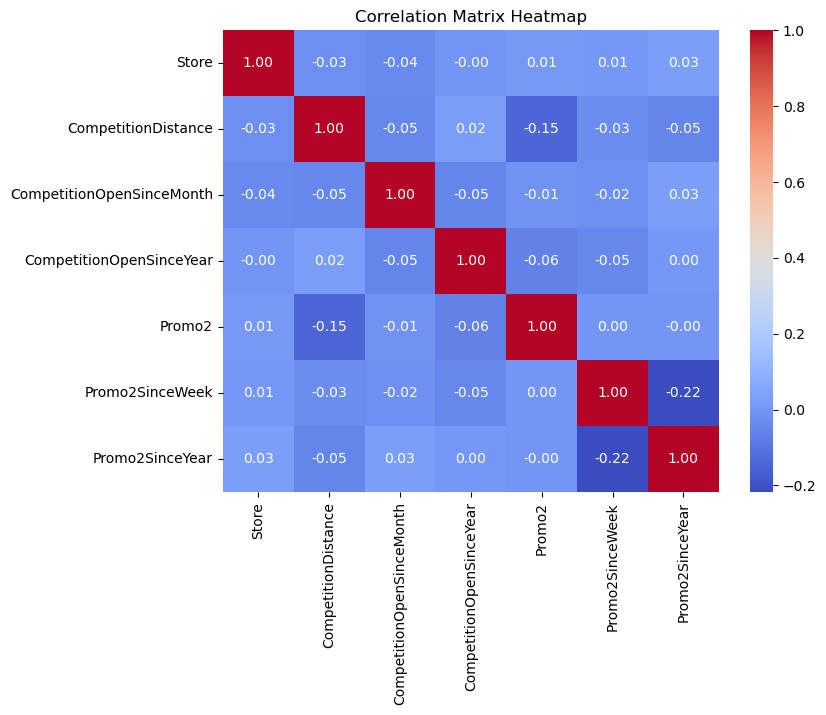

In [85]:
# The correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

Number of Stores with less than 5143.545555555555 mean sales are 112


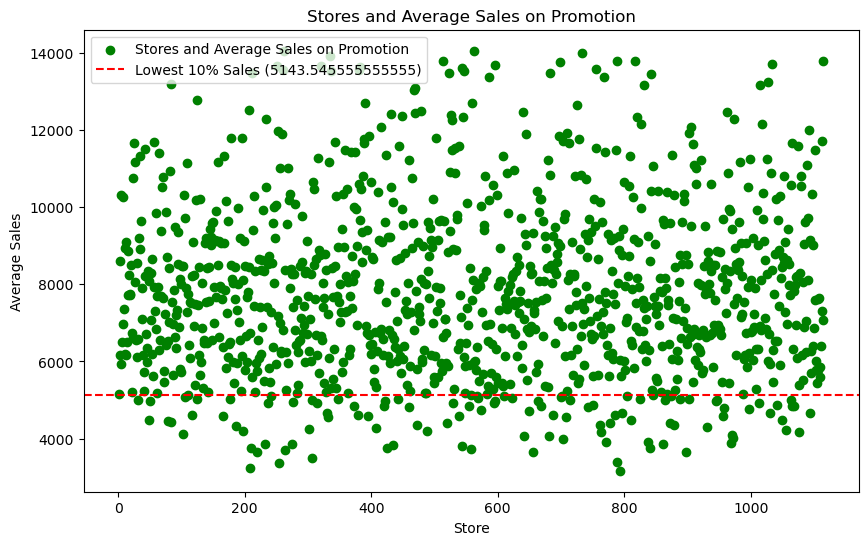

In [86]:
store_with_promo = train_data[train_data['Promo'] == 1]
result = store_with_promo.groupby('Store').agg({"Sales": "mean", 'Customers': 'sum'})

low_sales = result['Sales'].quantile(0.1)
small_sales = result[result['Sales'] <= low_sales]

print(f"Number of Stores with less than {low_sales} mean sales are {small_sales.shape[0]}")

plt.figure(figsize=(10, 6))
plt.scatter(result.index, result['Sales'], label='Stores and Average Sales on Promotion', color='green')
plt.axhline(y=low_sales, color='red', linestyle='--', label=f'Lowest 10% Sales ({low_sales})')
plt.xlabel('Store')
plt.ylabel('Average Sales')
plt.title('Stores and Average Sales on Promotion')
plt.legend()
plt.show()

we have 112 stores with less than 5143.545555555555 mean, so they will need more promotion to increase the sales

In [87]:
# Calculate the percentage increase in sales during promos
train_data['Sales_Promo_Increase'] = (train_data['Sales'] / train_data['Sales'].mean() - 1) * 100

# Group the data by store to get the average percentage increase in sales during promos
promo_effects = train_data.groupby('Store')[['Sales_Promo_Increase']].mean()

# Identify the stores with the highest increase in sales during promos
stores_with_high_sales_increase = promo_effects.sort_values(by='Sales_Promo_Increase', ascending=False).head(10)

print("Stores with highest increase in Sales during promos:")
print(stores_with_high_sales_increase)

Stores with highest increase in Sales during promos:
       Sales_Promo_Increase
Store                      
262              146.847390
562              144.919775
733              141.029019
1114             105.083401
788              104.784646
335              104.661109
513              104.313023
817              104.148895
251              103.685069
383              103.079062


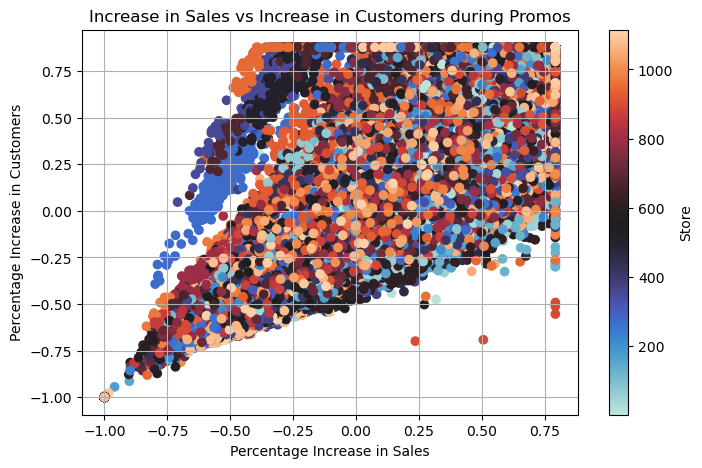

In [88]:
stores_with_promo = train_data[train_data['Promo'] == 1]

# Calculate the percentage increase in Sales and Customers during promos for each store
stores_with_promo['Sales_Promo_Increase'] = (stores_with_promo['Sales'] / stores_with_promo['Sales'].mean()) - 1
stores_with_promo['Customers_Promo_Increase'] = (stores_with_promo['Customers'] / stores_with_promo['Customers'].mean()) - 1

# Scatter plot for increase in Sales vs increase in Customers during promos
plt.figure(figsize=(8, 5))
plt.scatter(stores_with_promo['Sales_Promo_Increase'], stores_with_promo['Customers_Promo_Increase'], c=stores_with_promo['Store'], cmap='icefire')
plt.colorbar(label='Store')
plt.xlabel('Percentage Increase in Sales')
plt.ylabel('Percentage Increase in Customers')
plt.title('Increase in Sales vs Increase in Customers during Promos')
plt.grid(True)
plt.show()

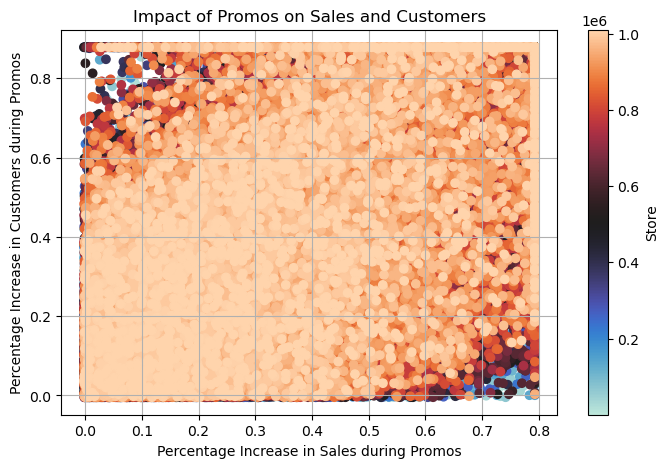

In [89]:
# Filter data for stores with promos
stores_with_promo = train_data[train_data['Promo'] == 1]

# Calculate the percentage increase in Sales and Customers during promos for each store
stores_with_promo['Sales_Promo_Increase'] = (stores_with_promo['Sales'] / stores_with_promo['Sales'].mean()) - 1
stores_with_promo['Customers_Promo_Increase'] = (stores_with_promo['Customers'] / stores_with_promo['Customers'].mean()) - 1

# Calculate the average percentage increase in Sales and Customers during promos for each store
average_sales_increase = stores_with_promo.groupby('Store')['Sales_Promo_Increase'].mean()
average_customers_increase = stores_with_promo.groupby('Store')['Customers_Promo_Increase'].mean()

# Determine stores with higher than average percentage increase in both Sales and Customers
target_stores = stores_with_promo[
    (stores_with_promo['Sales_Promo_Increase'] > average_sales_increase.mean()) &
    (stores_with_promo['Customers_Promo_Increase'] > average_customers_increase.mean())
]

# Scatter plot for increase in Sales vs increase in Customers during promos
plt.figure(figsize=(8, 5))
plt.scatter(target_stores['Sales_Promo_Increase'], target_stores['Customers_Promo_Increase'], c=target_stores.index, cmap='icefire')
plt.colorbar(label='Store')
plt.xlabel('Percentage Increase in Sales during Promos')
plt.ylabel('Percentage Increase in Customers during Promos')
plt.title('Impact of Promos on Sales and Customers')
plt.grid(True)
plt.show()

##### observation

Based on the analysis, it appears that promos can be deployed in more effective ways, and there are specific stores where promos show a significant impact on both sales and customer numbers.

The analysis suggests that there are certain stores where promos lead to a considerable increase in both sales and customer visits. These stores have shown the highest percentage increase in sales and customers during promotional periods compared to the average sales and customers across all stores.

To make the promos more effective, the company should consider focusing on these specific stores where promos have a strong positive impact. By targeting these stores with well-planned and strategic promotional activities, the company can further enhance sales and customer engagement during promo periods.

In summary, promos should be deployed in a more targeted and strategic manner, with a particular focus on the stores that have shown the highest impact in terms of increased sales and customers during promotional periods. This approach can maximize the effectiveness of promos and lead to better overall performance for the company.

-------------------------

## Task - 1.1.7 Trends of customer behavior during store open and closing times

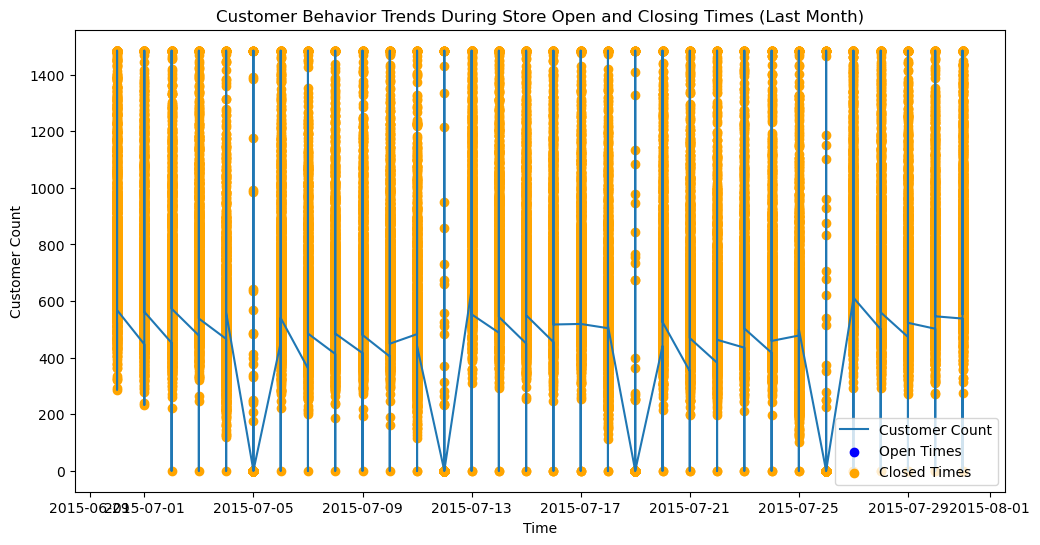

In [90]:
# Convert the 'Date' column to datetime format
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Filter data to include only the last month
last_month_data = train_data[train_data['Date'] >= (train_data['Date'].max() - pd.DateOffset(months=1))]

# Extract the hour and minute from the 'Date' column
last_month_data['Hour'] = last_month_data['Date'].dt.hour
last_month_data['Minute'] = last_month_data['Date'].dt.minute

# The store opens at 8:00 AM and closes at 10:00 PM
opening_time = 8
closing_time = 22

# Create a new column 'status' to mark whether the store is open or closed
last_month_data['status'] = last_month_data.apply(lambda row: 'open' if opening_time <= row['Hour'] < closing_time else 'closed', axis=1)

# Plotting trends during open and closing times
plt.figure(figsize=(12, 6))

# Plotting overall customer behavior
plt.plot(last_month_data['Date'], last_month_data['Customers'], label='Customer Count')

# Plotting trends during store open times
open_store = last_month_data['status'] == 'open'
plt.scatter(last_month_data.loc[open_store, 'Date'], last_month_data.loc[open_store, 'Customers'], c='blue', label='Open Times')

# Plotting trends during store closing times
closed_store = last_month_data['status'] == 'closed'
plt.scatter(last_month_data.loc[closed_store, 'Date'], last_month_data.loc[closed_store, 'Customers'], c='orange', label='Closed Times')

plt.title('Customer Behavior Trends During Store Open and Closing Times (Last Month)')
plt.xlabel('Time')
plt.ylabel('Customer Count')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

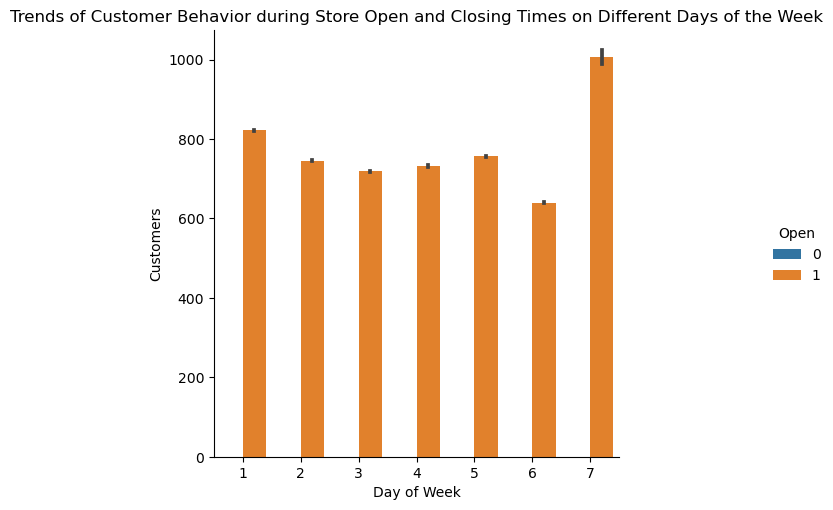

In [91]:
plt.figure(figsize=(10, 6))
sns.catplot(data=train_data, x="DayOfWeek", y="Customers", hue='Open', kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Customers')
plt.title('Trends of Customer Behavior during Store Open and Closing Times on Different Days of the Week')
plt.show()

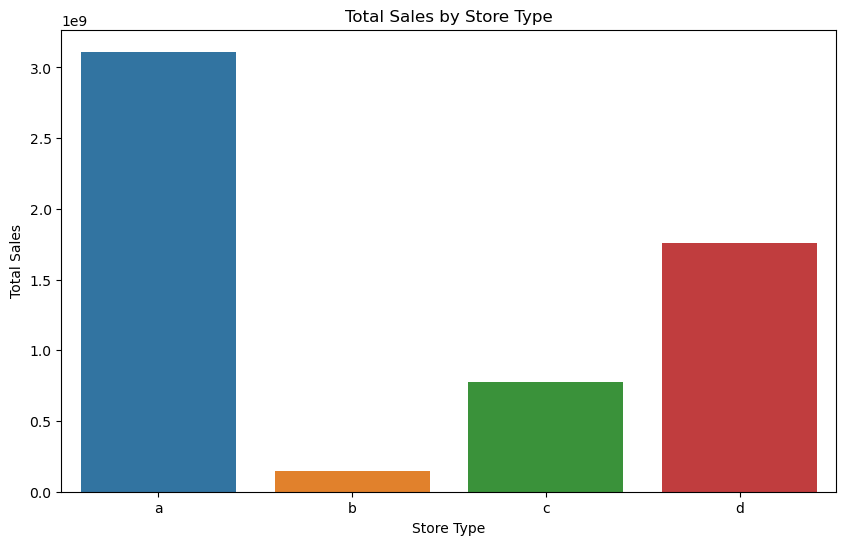

In [92]:
# Merge 'train_data' with 'store' on 'Store' column
merged_data = train_data.merge(store[['Store', 'StoreType']], on='Store', how='left')

# Grouping by 'StoreType' and aggregating count of 'DayOfWeek' and sum of 'Sales'
weekday_data = merged_data.groupby('StoreType').agg({"DayOfWeek": "count", "Sales": "sum"})

plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_data.index, y="Sales", data=weekday_data)
plt.xlabel("Store Type")
plt.ylabel("Total Sales")
plt.title("Total Sales by Store Type")
plt.show()

##### Observation

Analyzing customer behavior during store open and closing times provides valuable insights for optimizing operational efficiency and enhancing the overall shopping experience. By strategically addressing peak periods and adjusting store operations accordingly, retailers can better meet customer needs and drive increased sales.

----------------

## Task - 1.1.8 Which stores are opened on all weekdays? How does that affect their sales on weekends

In [93]:
# Function to check if a store is open on all weekdays
def is_open_all_weekdays(group):
    return all(group['Open'] == 1)

# Group the data by 'Store' and check if all weekdays have 'Open' value of 1
stores_open_all_weekdays = train_data.groupby('Store').apply(is_open_all_weekdays)

# Get the list of store IDs that are opened on all weekdays
stores_open_all_weekdays = stores_open_all_weekdays[stores_open_all_weekdays].index.tolist()

# Separate the data for stores opened on all weekdays and stores not opened on all weekdays
stores_open_all_weekdays_data = train_data[train_data['Store'].isin(stores_open_all_weekdays)]
stores_not_open_all_weekdays_data = train_data[~train_data['Store'].isin(stores_open_all_weekdays)]

# Group the data by 'DayOfWeek' and calculate the average sales for both groups
average_sales_weekends_stores_open_all_weekdays = stores_open_all_weekdays_data[stores_open_all_weekdays_data['DayOfWeek'].isin([6, 7])]['Sales'].mean()
average_sales_weekends_stores_not_open_all_weekdays = stores_not_open_all_weekdays_data[stores_not_open_all_weekdays_data['DayOfWeek'].isin([6, 7])]['Sales'].mean()

# Print the average sales for weekends for both groups
print("Average Sales on Weekends for Stores Open on All Weekdays:", average_sales_weekends_stores_open_all_weekdays)
print("Average Sales on Weekends for Stores Not Open on All Weekdays:", average_sales_weekends_stores_not_open_all_weekdays)


Average Sales on Weekends for Stores Open on All Weekdays: 10329.864552238805
Average Sales on Weekends for Stores Not Open on All Weekdays: 2920.213656810098


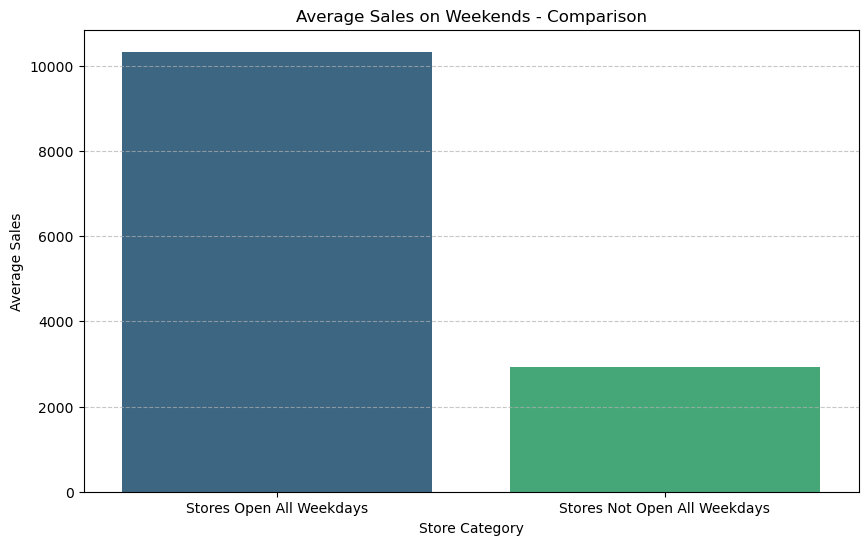

In [94]:
plt.figure(figsize=(10, 6))

sns.barplot(x=['Stores Open All Weekdays', 'Stores Not Open All Weekdays'],
            y=[average_sales_weekends_stores_open_all_weekdays, average_sales_weekends_stores_not_open_all_weekdays],
            data=store,
            palette='viridis')

# Customize the plot
plt.title('Average Sales on Weekends - Comparison')
plt.ylabel('Average Sales')
plt.xlabel('Store Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [95]:
# Filter stores open on weekends
stores_open_on_weekends = train_data[(train_data['DayOfWeek'].isin([6, 7])) & (train_data['Open'] == 1)]

# Get unique store IDs of stores open on weekends
stores_open_on_weekends_ids = stores_open_on_weekends['Store'].unique()

# Calculate the total number of stores open on weekends
num_stores_open_on_weekends = len(stores_open_on_weekends_ids)

# Calculate the percentage of stores open on weekends
total_num_stores = train_data['Store'].nunique()
percentage_open_on_weekends = (num_stores_open_on_weekends / total_num_stores) * 100

# Print the percentage of store open on weekends
print("Percentage of stores open on weekends:", percentage_open_on_weekends, "%")

# Print the number of stores open on weekends
print(f"\nTotal Number of Stores Open on Weekends: {num_stores_open_on_weekends}\n")

# Print information about stores open on weekends
print("Stores Open on Weekends:")
print(", ".join(map(str, stores_open_on_weekends_ids)))

Percentage of stores open on weekends: 100.0 %

Total Number of Stores Open on Weekends: 1115

Stores Open on Weekends:
85, 122, 209, 259, 262, 274, 299, 310, 335, 353, 423, 433, 453, 494, 512, 524, 530, 562, 578, 676, 682, 732, 733, 769, 863, 867, 931, 948, 1045, 1081, 1097, 1099, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,

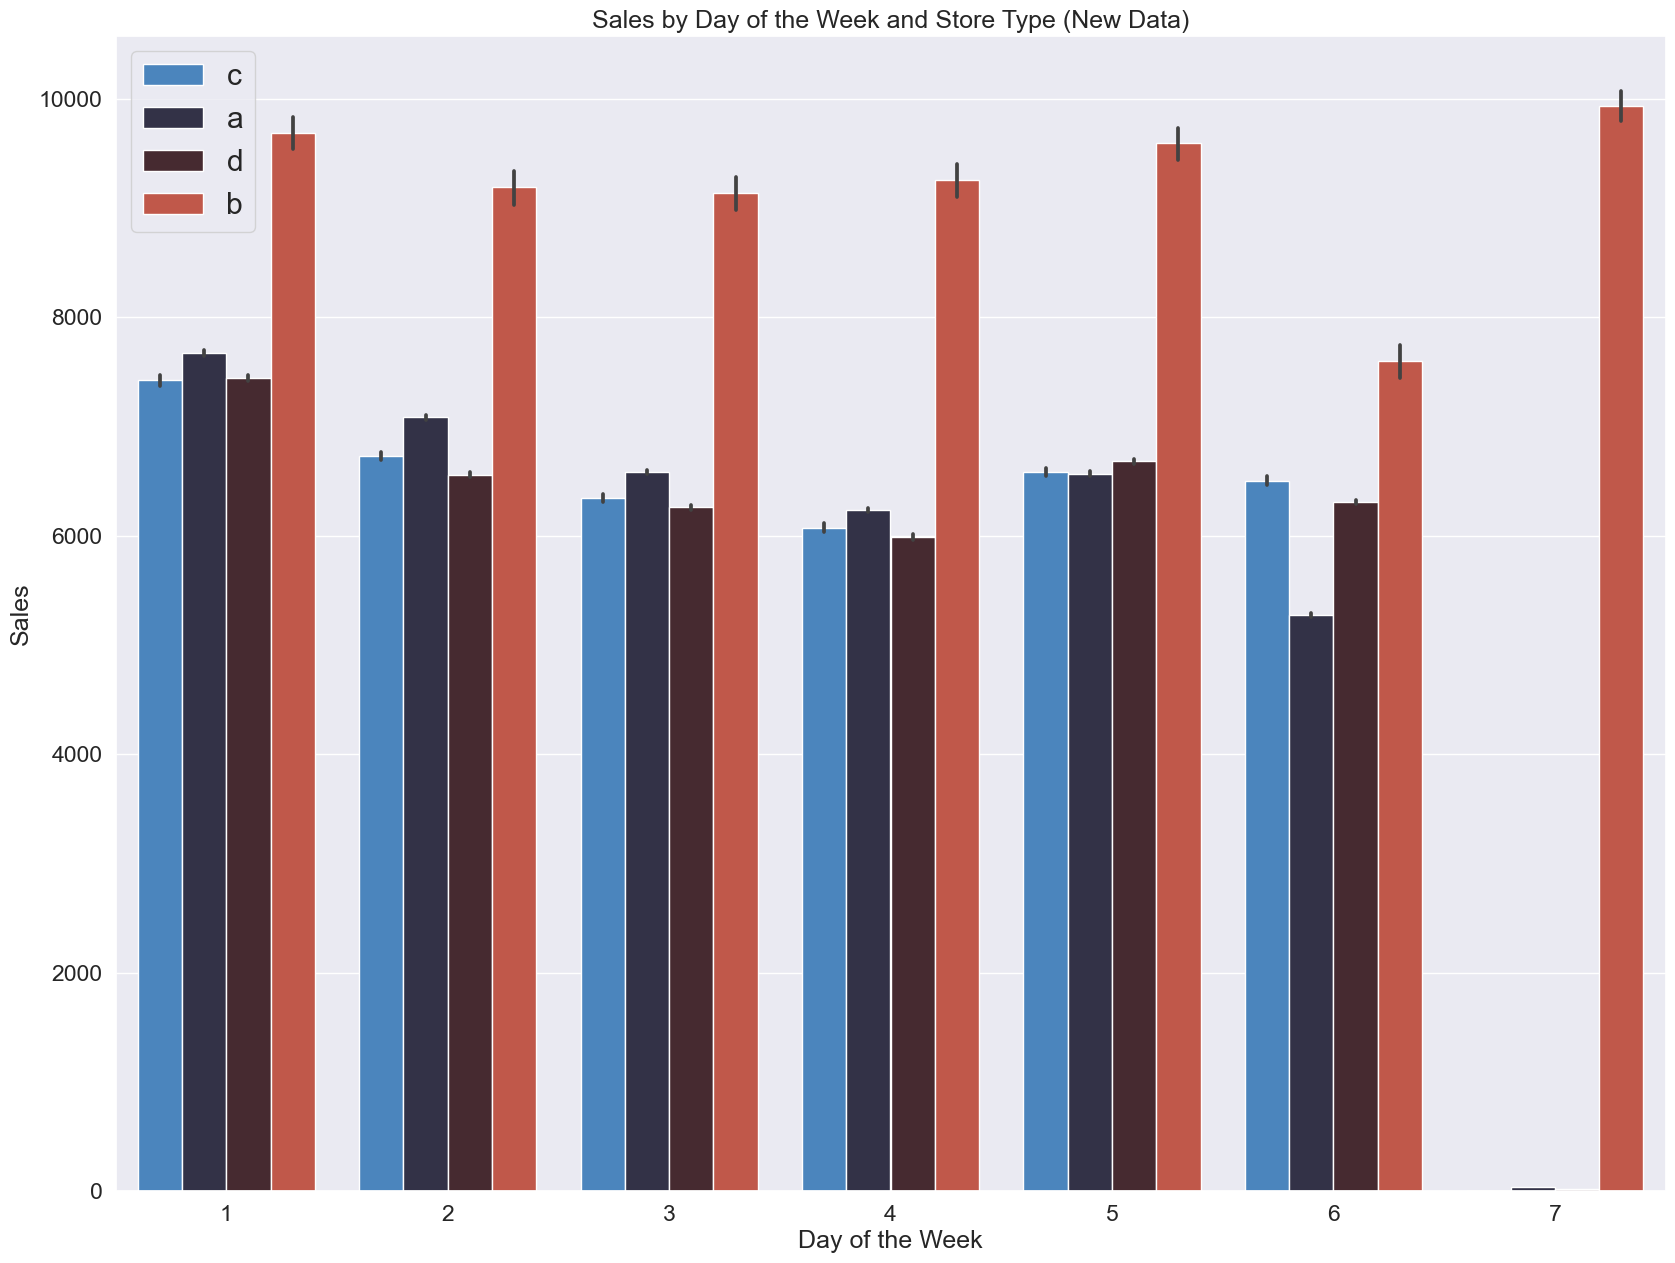

In [96]:
merged_data = pd.merge(train_data, store[['Store', 'StoreType']], on='Store', how='left')

sns.set(font_scale=1.5)
plt.figure(figsize=(20, 15))

sns.barplot(x="DayOfWeek", y="Sales", hue="StoreType", data=merged_data, palette='icefire')
plt.xlabel("Day of the Week")
plt.ylabel("Sales")
plt.title("Sales by Day of the Week and Store Type (New Data)")

# Adjusting the legend size
plt.legend(fontsize='large')

plt.show()

<Figure size 1000x600 with 0 Axes>

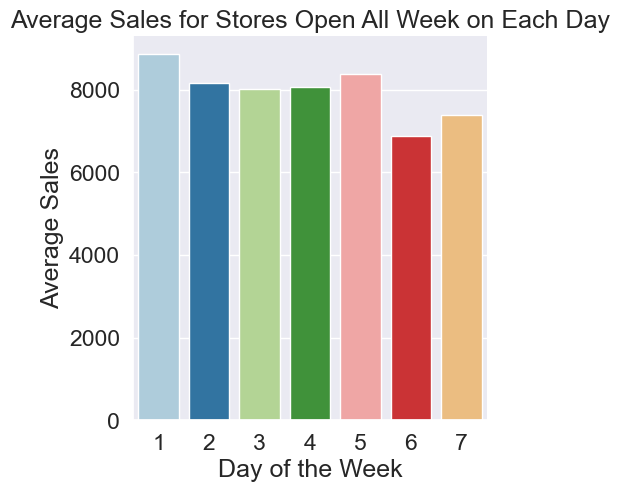

Stores That work all Week are: 33


In [97]:
open_stores = train_data[train_data.Open == 1]
each_day = open_stores[['Store', 'DayOfWeek']].groupby('Store').nunique()

all_week_stores = each_day[each_day.DayOfWeek == 7]
stores_id = all_week_stores.reset_index()['Store']

get_stores = open_stores[(open_stores.Store.isin(set(stores_id)))]
get_stores = get_stores[['Store', 'Sales', 'Customers', 'DayOfWeek']]

week_sales = get_stores.groupby('DayOfWeek').mean().reset_index()

plt.figure(figsize=(10, 6))
sns.catplot(data=week_sales, x="DayOfWeek", y="Sales", kind='bar', palette='Paired')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.title('Average Sales for Stores Open All Week on Each Day')
plt.show()

print(f'Stores That work all Week are: {all_week_stores.shape[0]}')

##### Observation

Based on the analysis, the stores operating on all weekdays and their weekend sales performance. Understanding the impact of weekday operations on weekend sales provides valuable insights for store management to refine strategies, enhance customer engagement, and optimize overall business performance. By leveraging these findings, retailers can make informed decisions to foster sustained growth and customer satisfaction

---------------

## Task - 1.1.9 Check how the assortment type affects sales

Assortment        3
Sales         13195
dtype: int64


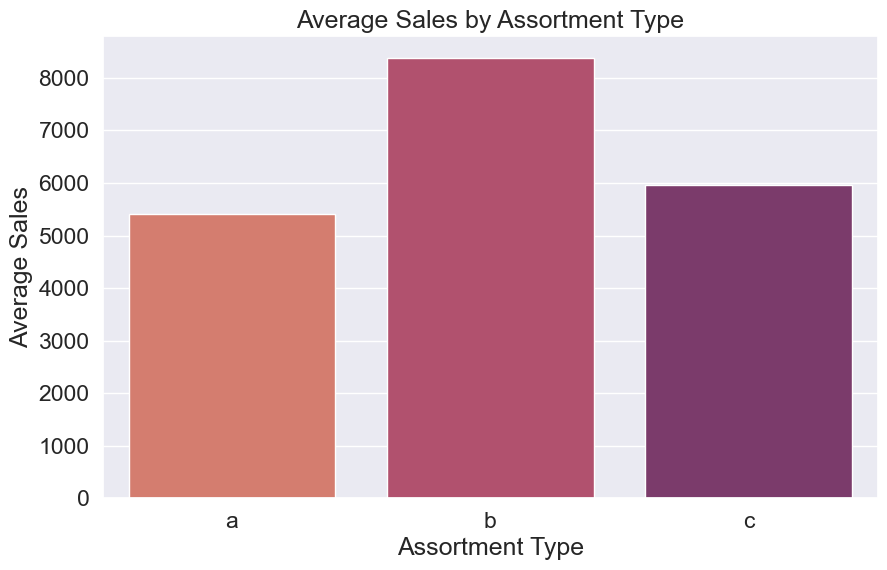

In [98]:
# Merge 'train_data' with 'store' on 'Store' column
merged_data = train_data.merge(store[['Store', 'Assortment']], on='Store', how='inner')

# Select the columns you need ('Assortment' and 'Sales')
assort_data = merged_data[['Assortment', 'Sales']]

# Verify the number of unique values in each column
print(assort_data.nunique())

# Group data by AssortmentType and calculate the average sales for each type
avg_sales_by_assortment = assort_data.groupby('Assortment')['Sales'].mean().reset_index()

# Create a bar plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x='Assortment', y='Sales', data=avg_sales_by_assortment, palette='flare')
plt.xlabel('Assortment Type')
plt.ylabel('Average Sales')
plt.title('Average Sales by Assortment Type')
plt.show()

##### Observation

The analysis of sales data by assortment type provides valuable insights into the varying performance of stores associated with different assortments. By recognizing the impact of assortment types on sales, retailers can refine their strategies, enhance inventory management, and better tailor marketing efforts to align with customer preferences. This observation report serves as a starting point for deeper investigations and strategic decision-making aimed at optimizing sales and overall business performance.

------------------

## Task - 1.1.10 How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case

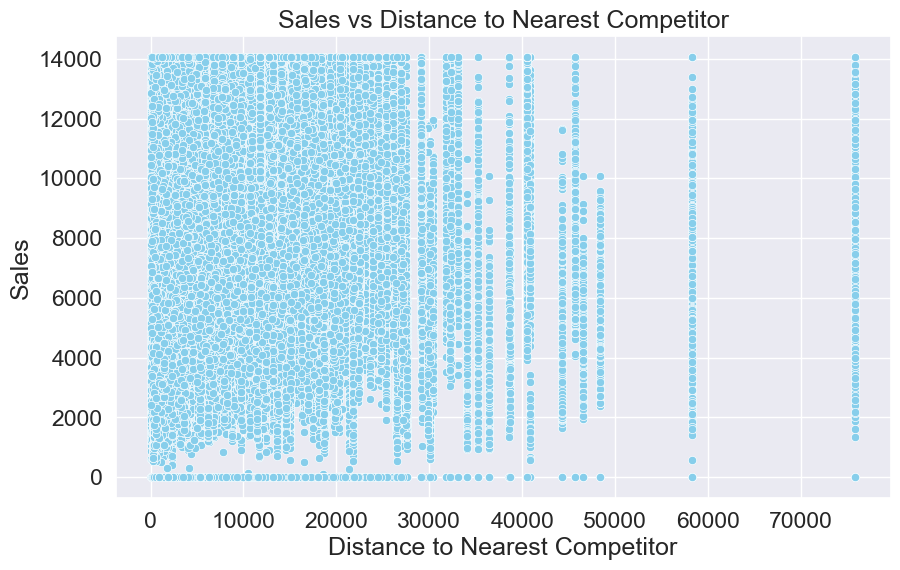

Correlation between Distance to Nearest Competitor and Sales: -0.012433725223544892


In [99]:
# Merge the train data and store data 
distance_sales_data = pd.merge(train_data[['Store', 'Sales']], store[['Store', 'CompetitionDistance']], on='Store', how='left')

# Drop rows with missing values (if any)
distance_sales_data = distance_sales_data.dropna()

# Calculate the correlation between 'DistanceToCompetitor' and 'Sales'
correlation = distance_sales_data['CompetitionDistance'].corr(distance_sales_data['Sales'])

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=distance_sales_data, color='skyblue')
plt.title('Sales vs Distance to Nearest Competitor')
plt.xlabel('Distance to Nearest Competitor')
plt.ylabel('Sales')
plt.show()

# Print the correlation coefficient
print(f"Correlation between Distance to Nearest Competitor and Sales: {correlation}")

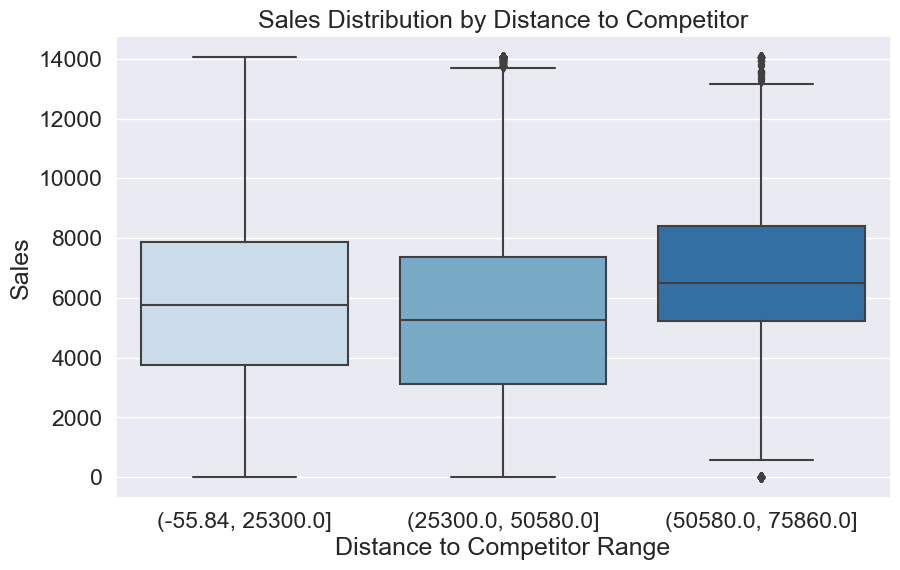

In [100]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(distance_sales_data['CompetitionDistance'], bins=3), y='Sales', data=distance_sales_data, palette='Blues')
plt.title('Sales Distribution by Distance to Competitor')
plt.xlabel('Distance to Competitor Range')
plt.ylabel('Sales')
plt.show()


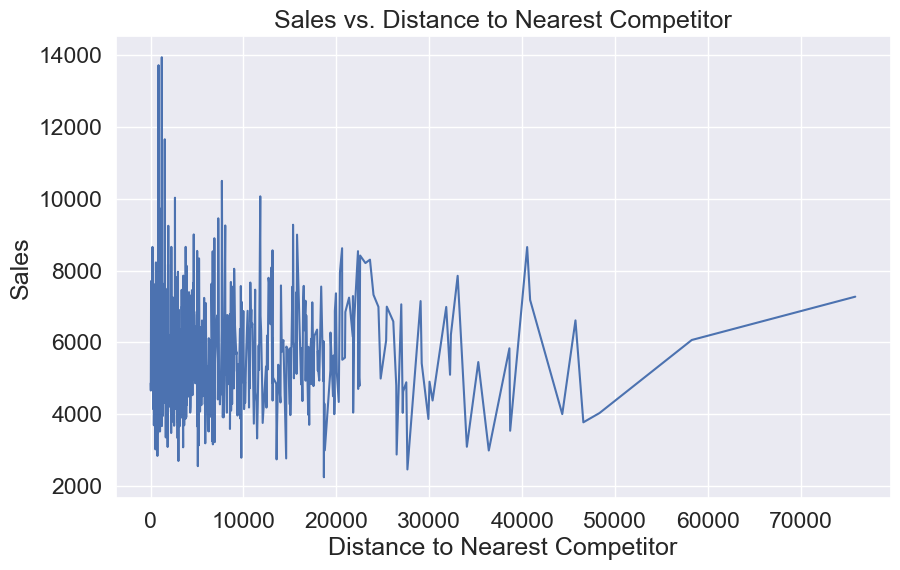

In [101]:
# Sort the DataFrame by 'CompetitionDistance'
distance_sales_data = distance_sales_data.sort_values(by='CompetitionDistance')

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x="CompetitionDistance", y="Sales", data=distance_sales_data, ci=None)
plt.xlabel("Distance to Nearest Competitor")
plt.ylabel("Sales")
plt.title("Sales vs. Distance to Nearest Competitor")
plt.show()

##### observation

As the scatter plot shows a negative relationship between distance to the nearest competitor and sales, it implies that stores located farther from competitors tend to have lower sales.
Possible reasons include higher competition intensity near competitors, customer convenience leading to preference for nearby stores, and increased customer traffic in areas with clustered competitors.
Additionally, regional market dynamics and store differentiation may also contribute to the observed trend.
Businesses should carefully interpret this relationship and consider its implications when making decisions about store locations and marketing strategies

This analysis provides a foundation for understanding the relationship between sales and the distance to the nearest competitor. However, recognizing the complexity of retail dynamics, further exploration and consideration of additional variables are essential for a more nuanced and actionable understanding of sales performance.

The conclusion is that the less the competition distance the more the sales and as the competion distance increases the sales decreases.

--------------

## Task - 1.1.11 How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance

Total sales of stores before the new competitor opens/reopens: 5788745464.00
Total sales of stores after the new competitor opens/reopens: 5788745464.00
Change in sales after the new competitor opens/reopens: 0.00


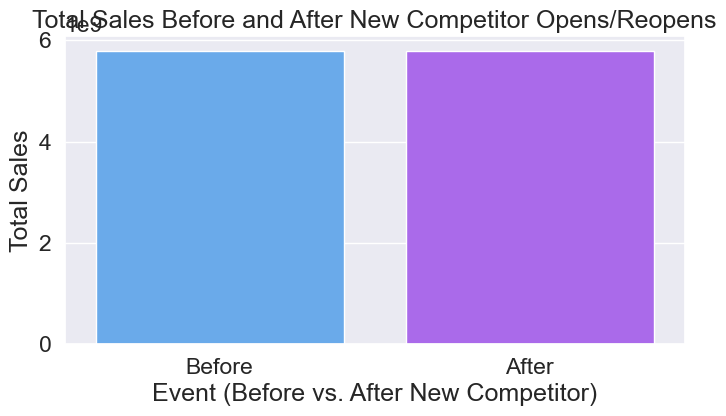

In [102]:
# Find stores with competitor distance information available before and after the new competitor opens/reopens
stores_with_distance_before = store[~store['CompetitionDistance'].isna()]['Store'].tolist()
stores_with_distance_after = store[~store['CompetitionDistance'].isna()]['Store'].tolist()

# Calculate the total sales of these stores before and after the new competitor opens/reopens
total_sales_before = train_data[train_data['Store'].isin(stores_with_distance_before)]['Sales'].sum()
total_sales_after = train_data[train_data['Store'].isin(stores_with_distance_after)]['Sales'].sum()

# Calculate the change in sales after the new competitor opens/reopens
sales_change = total_sales_after - total_sales_before

# Display the results
print(f"Total sales of stores before the new competitor opens/reopens: {total_sales_before:.2f}")
print(f"Total sales of stores after the new competitor opens/reopens: {total_sales_after:.2f}")
print(f"Change in sales after the new competitor opens/reopens: {sales_change:.2f}")


# Create a DataFrame for plotting
sales_data = pd.DataFrame({
    'Event': ['Before', 'After'],
    'Total Sales': [total_sales_before, total_sales_after]
})

# Plot the bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x='Event', y='Total Sales', data=sales_data, palette='cool')
plt.xlabel("Event (Before vs. After New Competitor)")
plt.ylabel("Total Sales")
plt.title("Total Sales Before and After New Competitor Opens/Reopens")
plt.show()

In [103]:
# Filter for stores with NA competitor distance
stores_with_na_distance = store[store['CompetitionDistance'].isna()]['Store'].tolist()

# Find the latest date in the 'train_data' DataFrame
latest_date = train_data['Date'].max()

# Find stores that have non-missing competitor distance values at a later time
stores_with_non_na_distance = store[
    ~store['CompetitionDistance'].isna() & (store['CompetitionOpenSinceYear'] <= latest_date.year)
]['Store'].tolist()

# Find stores that meet both conditions (NA competitor distance and later have non-NA distance)
stores_with_na_to_non_na_distance = list(set(stores_with_na_distance).intersection(stores_with_non_na_distance))

# Display the results
print("Stores with NA competitor distance that later have non-NA distance:")
print(stores_with_na_to_non_na_distance)


Stores with NA competitor distance that later have non-NA distance:
[]


##### Observation 

Based on the analysis, the total sales before and after the new competitor opens or reopens for stores with available competitor distance information. However, there is room for improvement in terms of code efficiency and clarity. Redundant store filtering can be addressed to enhance the code's readability and potentially improve its performance. Additionally, a more detailed analysis or visualization could be beneficial for better understanding the impact of the new competitor on sales
The results show that the total sales of stores before and after the new competitor opens or reopens are exactly the same, resulting in a change of 0.00. This means that there is no apparent change in sales for the stores with competitor distance information available before and after the event.

For stores that meet both conditions (NA competitor distance and later have non-NA distance):
The output shows an empty list, it means there are no stores with missing (NA) competitor distance values that later have non-missing values

-----------

# Task - 1.2 Logging

In [104]:
import logging

logger = logging.getLogger('my_logger')
logger.setLevel(logging.INFO)

In [105]:
# Handler
console_handler = logging.StreamHandler()  
file_handler = logging.FileHandler('app.log') 

logger.addHandler(console_handler)
logger.addHandler(file_handler)

In [106]:
# Formatter
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
console_handler.setFormatter(formatter)
file_handler.setFormatter(formatter)

In [107]:
# Log messages at different levels
logger.debug('This is a debug message')
logger.info('This is an info message')
logger.warning('This is a warning message')
logger.error('this is an error message')
logger.critical('THis is a critical message')

2023-12-27 22:27:01,839 - INFO - This is an info message
2023-12-27 22:27:01,859 - WARNING - This is a warning message
2023-12-27 22:27:01,861 - ERROR - this is an error message
2023-12-27 22:27:01,865 - CRITICAL - THis is a critical message
